##Society Score Project

The given dataset contains building energy efficiency data.
This dataset contains independent variables that might be used to infer interesting facts about buildings in New York. Of primary interest is the Energy Star score, since this score is used as an aggregate measure of a building’s energy performance.

###Given task:
1. Does this dataset contain a set of independent variables that correlate to the energy star rating of the building?
2. For buildings without energy star scores, can you infer what their score might be?

To answer this question prepare a reasoned investigation of this hypothesis in a Jupyter notebook.
The best method is to perform visual statistical descriptions of the data using summary tables or a graphing library of your choice. Then train a model and evaluate it. You might regress data to predict the numeric score - or bin
the scores into “grades” (A, B, C, D, F) and apply a classifier. You might cluster buildings to determine if similar groups exist.
Create one or more of these models and give an interpretation of their performance, which can then be used to answer the question of whether this dataset contains enough information to understand the relationship of an energy
star score to buildings of different types. For the model performance, check the typical/appropriate evaluation metrics as such as F1 scores, R-squared scores, etc.

Steps to be followed:
Importing libraries

Importing datasets

Data Cleaning: Missing Values detection and treatment

Outliers detection and treatment

Transformation of Variables

Scaling the Numerical Variables

Encoding the Categorical Variables

Creation of New Variables

Splitting the data into training and test set

Model Training (try a couple of different algos and select the algo with highest accuracy)

Evaluate Model

Hyper parameter tunning for the model



---


###Importing libraries:

Importing the basic libraries. The model specific libraries will be imported later as required

In [ ]:
# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# 'Pandas' is used for data manipulation and analysis
import pandas as pd

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt
%matplotlib inline

# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

from matplotlib.ticker import FormatStrFormatter



---


###Reading the data from csv

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#importing the csv file into a pandas dataframe named 'org_data'. This is for backup incase need to check somethng from the actual data
org_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ML/ML Project/Society Score/Energy_and_Water_Data_Disclosure_for_Local_Law_84_2017__Data_for_Calendar_Year_2016_.csv")

In [ ]:
#importing the csv file into a pandas dataframe named 'data'
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ML/ML Project/Society Score/Energy_and_Water_Data_Disclosure_for_Local_Law_84_2017__Data_for_Calendar_Year_2016_.csv")#importing the csv file into a pandas dataframe named 'data'

In [ ]:
#Setting the display max columns to none so that all the columns in the dataset are visible.
pd.set_option('display.max_columns', None)

In [ ]:
#Exploring the first 5 rows from the dataset
data.head()

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,1,13286,201/205,13286,201/205,1013160001,1013160001,1037549,201/205 East 42nd st.,Not Available,10017,675,3 AVENUE,Manhattan,289356.0,Office,Office,Office,293447,Not Available,Not Available,Not Available,Not Available,1963,2,100,Whole Building,Not Available,Not Available,305.6,303.1,37.8,Not Available,614.2,Not Available,Not Available,Not Available,Not Available,Not Available,5.15506751E7,Not Available,Not Available,38139374.2,1.10827705E7,6962.2,0,6962.2,762051,Not Available,Not Available,619.4,05/01/2017 05:32:03 PM,No,In Compliance,40.750791,-73.973963,6.0,4.0,88.0,Turtle Bay-East Midtown ...
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,Not Available,10032,180,FT WASHINGTON AVENUE,Manhattan,3693539.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),3889181,Not Available,Not Available,Not Available,Not Available,1969,12,100,Whole Building,Whole Building,55,229.8,228.8,24.8,2.4,401.1,Not Available,1.96248472E7,Not Available,Not Available,Not Available,-3.914148026E8,933073441,9330734.4,332365924,9.62613121E7,55870.4,51016.4,4854.1,3889181,Not Available,Not Available,404.3,04/27/2017 11:23:27 AM,No,In Compliance,40.841402,-73.942568,12.0,10.0,251.0,Washington Heights South ...
2,3,4778226,MSCHoNY North,28400,NYP Columbia (West Campus),1021380030,1-02138-0030,1063380,3975 Broadway,Not Available,10032,3975,BROADWAY,Manhattan,152765.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),231342,Not Available,Not Available,Not Available,Not Available,1924,1,100,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,0,0,0,231342,Not Available,Not Available,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.840427,-73.940249,12.0,10.0,251.0,Washington Heights South ...
3,4,4778267,Herbert Irving Pavilion & Millstein Hospital,28400,NYP Columbia (West Campus),1021390001,1-02139-0001,1087281; 1076746,161 Fort Washington Ave,177 Fort Washington Ave,10032,161,FT WASHINGTON AVENUE,Manhattan,891040.0,Hos

Intial thoughts about the data:
- Order: Looks more like index of the dataframe, except its starting from 1.
- But there is also roperty Id which is again a unique id value. Will explore more on the Order and property id columns
- Most of the columns have numeric values
- There are a lot of 'Not Available' values in the data. These are probably null values





---


###Exploring the dataset

In [ ]:
#Checking the dimensions of the dataset
data.shape

(11746, 60)

There are 11746 rows of data arranged in 60 columns

In [ ]:
#Checking the full information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 60 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Order                                                       11746 non-null  int64  
 1   Property Id                                                 11746 non-null  int64  
 2   Property Name                                               11746 non-null  object 
 3   Parent Property Id                                          11746 non-null  object 
 4   Parent Property Name                                        11746 non-null  object 
 5   BBL - 10 digits                                             11735 non-null  object 
 6   NYC Borough, Block and Lot (BBL) self-reported              11746 non-null  object 
 7   NYC Building Identification Number (BIN)                    11746 non-null  object 
 

The info of the data set shows there are some features which have null values. Most of the features are of object datatype, although judging by the feature name the values might be numerical type. This can be fixed in the later steps as we explore and understand the data more.

In [ ]:
data.describe()

,Order,Property Id,DOF Gross Floor Area,Year Built,Number of Buildings - Self-reported,Occupancy,Property GFA - Self-Reported (ft²),Latitude,Longitude,Community Board,Council District,Census Tract
count,11746.000000,1.174600e+04,1.162800e+04,11746.000000,11746.000000,11746.000000,1.174600e+04,9483.000000,9483.000000,9483.000000,9483.000000,9483.000000
mean,7185.759578,3.642958e+06,1.732695e+05,1948.738379,1.289971,98.762557,1.673739e+05,40.754379,-73.957057,7.140673,15.771275,4977.596647
std,4323.859984,1.049070e+06,3.367055e+05,30.576386,4.017484,7.501603,3.189238e+05,0.080120,0.046337,3.954129,15.674375,13520.422990
min,1.000000,7.365000e+03,5.002800e+04,1600.000000,0.000000,0.000000,0.000000e+00,40.516065,-74.243582,1.000000,1.000000,1.000000
25%,3428.250000,2.747222e+06,6.524000e+04,1927.000000,1.000000,100.000000,6.699400e+04,40.707226,-73.984662,4.000000,4.000000,100.000000
50%,6986.500000,3.236404e+06,9.313850e+04,1941.000000,1.000000,100.000000,9.408000e+04,40.759130,-73.962810,7.000000,9.000000,201.000000
75%,11054.500000,4.409092e+06,1.596140e+05,1966.000000,1.000000,100.000000,1.584140e+05,40.817623,-73.932443,9.000000,33.000000,531.500000
max,14993.000000,5.991312e+06,1.354011e+07,2019.000000,161.000000,100.000000,1.421712e+07,40.912869,-73.715543,56.000000,51.000000,155101.000000


In [ ]:
data.describe(include='object')

,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,Postal Code,Street Number,Street Name,Borough,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,NTA
count,11746,11746,11746,11735,11746,11746,11746,11746,11746,11622,11624,11628,11746,11746,11746,11746,11746,11746,11746,11746,11746,11746,11746,11746,11746,11746,11746,11746,11746,11746,11746,11746,11746,11746,11746,11746,11746,11746,11746,11746,11746,11746,11746,11746,11746,11628,11716,9483
unique,11740,102,103,11580,11582,11508,11645,177,286,4198,2024,5,55,813,54,9484,59,2264,50,964,8,7,101,1959,1944,441,66,2795,10,1906,1180,259,15,927,10155,9632,11406,10879,7818,5968,5853,7230,5607,2920,3537,2,1,144
top,Clinton West Condominium,Not Applicable: Standalone Property,Not Applicable: Standalone Property,1019730001,1019730001,Not Available,410 West 118th Street,Not Available,10022,1,BROADWAY,Manhattan,Multifamily Housing,Multifamily Housing,Multifamily Housing,70000,Not Available,Not Available,Not Available,Not Available,Whole Building,Whole Building,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,0,0,0,Not Available,Not Available,Not Available,05/01/2017 02:58:14 PM,Yes,In Compliance,Midtown-Midtown South ...
freq,2,11324,11324,26,26,162,12,11539,269,66,390,5176,8688,6182,8694,61,8005,8005,10262,10262,11648,7111,2104,163,1465,787,1963,1465,11737,9165,10425,11152,11730,10810,1442,1962,244,786,108,892,194,3984,3984,163,1258,7552,11716,720


- 'Not Available' is repeated quite a lot in object type features.

###Data Cleaning:

Going over the data one column at a time and checking for null values, outliers treating them.

####**Order**:

Order of BBL (Borough,Block and Lot) on the disclosure data set

In [ ]:
#Checking for unique values
data.Order.nunique()

11746

In [ ]:
data.Order.value_counts()

1        1
9566     1
9568     1
9576     1
9577     1
        ..
4479     1
4480     1
4481     1
4482     1
14993    1
Name: Order, Length: 11746, dtype: int64

Looks like all the values are unique values. The number of unique values is equal to the rows in the dataset. So, none of the values are repeated.

In [ ]:
#checking for null values
data.Order.isna().sum()

0

Order feature has no null values and all the data in it are unique identifiers. There is a Property Id column also. From the feature document, Order is like a serial number for the BBL. This column can be droped as it is not so usefull for the model.

In [ ]:
#Dropping the Order column
data.drop('Order', axis=1, inplace=True)

####**Property Id, Propert Name**:

Basic property information includes property id and name.  

In [ ]:
#Checking for unique values in Property Id
data['Property Id'].nunique()

11746

In [ ]:
data['Property Id'].value_counts()

13286      1
4400665    1
4125396    1
2830973    1
4043095    1
          ..
3526401    1
4803003    1
4398358    1
2811408    1
4952165    1
Name: Property Id, Length: 11746, dtype: int64

All the values are unique and there are no null values.

In [ ]:
#Checking for unique values in Property Name
data['Property Name'].nunique()

11740

In [ ]:
data['Property Name'].value_counts()

Clinton West Condominium           2
Main Hospital                      2
Jetro Cash && Carry                2
East Building                      2
Fairchild                          2
                                  ..
E61                                1
Lawrence - 300 East 62nd Street    1
AKAM - 350 East 62nd Street        1
301 E 62 St.                       1
Tryad: 420 Clinton Ave             1
Name: Property Name, Length: 11740, dtype: int64

Some of the values are repeating here. Both these columns are Personal Info Identifiers. We can keep Property Id for now, but dropping Property Name, as its just the name of the property, does not have any pattern that can be usefull for the model.

In [ ]:
data.drop(['Property Name'], axis=1, inplace=True)

####Parent Property Id, Parent Property Name
**Parent Property Id**:

The ID for the campus is referred to as the Parent Property ID.

**Parent Property Name**: The campus name

In [ ]:
data['Parent Property Id'].nunique()

102

In [ ]:
data['Parent Property Id'].value_counts()

Not Applicable: Standalone Property    11324
3612678                                   57
3616399                                   33
4985858                                   20
4442823                                   13
                                       ...  
4907691                                    1
4907695                                    1
4924553                                    1
4924559                                    1
4905373                                    1
Name: Parent Property Id, Length: 102, dtype: int64

In [ ]:
11324/data.shape[0]

0.9640728758726375

These features indicate if the building is a standalone property or is it a part of a campus. The Parent Property Id has 96% of the values listed as 'Not Applicable: Standalone Property'

In [ ]:
data['Parent Property Name'].nunique()

103

In [ ]:
data['Parent Property Name'].value_counts()

Not Applicable: Standalone Property       11324
Columbia University (morningside)            57
New York University: Washington Square       33
Original Campus                              20
Second Housing Company Inc                   13
                                          ...  
Deepdale Corp 2 Cluster F                     1
Deepdale Corp 3 Cluster J                     1
Deepdale Corp 3 Cluster G                     1
Deepdale Corp 3 Cluster H                     1
Beech Hills Corp 1 Site 6                     1
Name: Parent Property Name, Length: 103, dtype: int64

- Samilar to Parent Property Id. 96% are stand alone property.

- Dropping the Parent Property Name as it is just a id info, does not have any useful pattern.

- Parent Property Id: The data in this column is unbalanced. As 96% of the values indicate weather the property is stand alone or not, I am going to drop this column but create another binary column 'Standalone Property' which tells if the property is stand alone or not.

In [ ]:
#Creating new column Standalone Property and filling it with dummy data based on the 'Not Applicable: Standalone Property' value from Property Id
data['Standalone Property'] = pd.get_dummies(data['Parent Property Id'].astype('object'))['Not Applicable: Standalone Property'].astype(int)

In [ ]:
#Dropping both Parent Property Id and Parent Property Name
data.drop(['Parent Property Id', 'Parent Property Name'], axis=1, inplace=True)

In [ ]:
data.sample(5)

,Property Id,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA,Standalone Property
2136,4449411,1008940071,1008940071,1019161,130 East 39th St.,Not Available,10016,130,EAST 39 STREET,Manhattan,132716.0,Hotel,Hotel,Hotel,141567,Not Available,Not Available,Not Available,Not Available,1927,1,100,Whole Building,Not Available,52,95.4,100.4,13.8,0,202,Not Available,6611138.3,Not Available,Not Available,Not Available,Not Available,55045.4,608.4,6836268.2,1959245.7,1127.9,493.5,634.4,141567,11950.9,84.42,199.2,04/03/2017 03:49:00 PM,Yes,In Compliance,40.749631,-73.977670,6.0,4.0,80.0,Murray Hill-Kips Bay ...,1
9746,4845282,4002940200,4-00294-0200,4003566,30-54 Review Ave,Not Available,11101,30-54,REVIEW AVENUE,Queens,89615.0,Mixed Use Property,Other,Other,89615,Not Available,Not Available,Not Available,Not Available,1922,1,85,Tenant areas only,Not Available,Not Available,23.8,24.9,2.1,0.2,41,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,1488816.7,15907.7,646928.4,186686.3,139.1,79.1,60,89615,311.2,3.47,40.1,04/20/2017 02:04:47 PM,Yes,In Compliance,NaN,NaN,NaN,NaN,NaN,NaN,1
5786,3529396,2025800011,2-02580-0011,2120164,520 Concord Avenue,Not Available,10455,520,CONCORD AVENUE,Bronx,67713.0,Multifamily Housing,Multifamily Housing,Multifamily Housing,71099,Not Available,Not Available,Not Available,Not Available,2007,1,100,Whole Building,Whole Building,86,50.7,53.5,6.5,0.3,102.2,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,1991550,22378.9,1612926.4,458651,255.5,105.8,149.7,71099,Not Available,Not Available,100.6,05/01/2017 02:58:14 PM,Yes,In Compliance,40.812399,-73.908379,1.0,8.0,35.0,Mott Haven-Port Morris ...,1
9437,5531561,3077760026,3-07776-0026,3215591,1270 EAST 51 STREET,Not Available,11234,1270,EAST 51 STREET,Brooklyn,149521.0,Multifamily Housing,Multifamily Housing,Multifamily Housing,149521,Not Available,Not Available,Not Available,Not Available,1966,1,95,Whole Building,Not Available,61,82,87.7,4.8,0.7,126.6,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,9742516.6,106518.8,2516078.8,722432.1,751,517.5,233.5,149521,7753.1,51.85,121.3,03/24/2017 03:44:02 PM,No,In Compliance,40.629792,-73.927035,18.0,46.0,728.0,Flatlands ...,1
5890,2884765,2027500022,2027500022,2006148,1206-08-12 Westchester Ave,Not Available,10457,1206,WESTCHESTER AVENUE,Bronx,81708.0,Multifamily Housing,Multifamily Housing,Multifamily Housing,81708,Not Available,Not Availabl

####**BBL - 10 digits, NYC Borough, Block and Lot (BBL) self-reported:**

10-digit property borough, block and lot identifier verified by the Department of Finance (DOF).
- The first number represents the borough, where
    * 1 is Manhattan,
    * 2 is the Bronx,
    * 3 is Brooklyn,
    * 4 is Queens, and
    * 5 is Staten Island.
- The following five numbers represent the tax block. If a property has a tax block that is less than 5 digits, then zeros are added before the block number so there are five digits in total.  
- The last four digits are the tax lot number.

Both BBL - 10 digits, NYC Borough, Block and Lot (BBL) self-reported give the same information.

In [ ]:
#checking for unique values
print('BBL - 10 digits = ', data['BBL - 10 digits'].nunique())
print('NYC Borough, Block and Lot (BBL) self-reported = ', data['NYC Borough, Block and Lot (BBL) self-reported'].nunique())

BBL - 10 digits =  11580
NYC Borough, Block and Lot (BBL) self-reported =  11582


In [ ]:
#Checking for repeated values
print('BBL - 10 digits =\n', data['BBL - 10 digits'].value_counts())
print('-----------------------------------')
print('NYC Borough, Block and Lot (BBL) self-reported =\n', data['NYC Borough, Block and Lot (BBL) self-reported'].value_counts())

BBL - 10 digits =
 1019730001    26
4067900001    13
4067920600    13
1018860001    10
3019200001     8
              ..
1014860049     1
1014870039     1
1014877501     1
1014877502     1
3019600022     1
Name: BBL - 10 digits, Length: 11580, dtype: int64
-----------------------------------
NYC Borough, Block and Lot (BBL) self-reported =
 1019730001        26
4-06792-0600      13
4-06790-0001      13
Not Available     11
1018860001        10
                  ..
1-01486-0049       1
1014870039         1
1014877501         1
1-01487-7502       1
3-01960-0022\t     1
Name: NYC Borough, Block and Lot (BBL) self-reported, Length: 11582, dtype: int64


In [ ]:
#Checking for null values
print('BBL - 10 digits = ', data['BBL - 10 digits'].isna().sum())
print('NYC Borough, Block and Lot (BBL) self-reported = ', data['NYC Borough, Block and Lot (BBL) self-reported'].isna().sum())

BBL - 10 digits =  11
NYC Borough, Block and Lot (BBL) self-reported =  0


- Both the features have upto 98% unique values.
- The number of null values are also same, except the 'NYC Borough, Block and Lot (BBL) self-reported' has value 'Not Applicable' for null values.
- There is also some formating for the data in 'NYC Borough, Block and Lot (BBL) self-reported'. Like '-' and ';', etc.

But, since both features have the same information, we can drop one of them. Dropping 'NYC Borough, Block and Lot (BBL) self-reported'

In [ ]:
#Dropping NYC Borough, Block and Lot (BBL) self-reported
data.drop('NYC Borough, Block and Lot (BBL) self-reported', axis=1, inplace=True)

In [ ]:
#Checking null values in BBL 10 digits
data[data['BBL - 10 digits'].isna()==True]

,Property Id,BBL - 10 digits,NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA,Standalone Property
24,2809896,NaN,Not Available,560 Riverside Drive,Not Available,10027,NaN,NaN,NaN,NaN,Residence Hall/Dormitory,Residence Hall/Dormitory,Residence Hall/Dormitory,535632,Not Available,Not Available,Not Available,Not Available,1964,2,100,Whole Building,Whole Building,Not Available,115.9,118.8,0,1.2,124.7,Not Available,Not Available,Not Available,450000,Not Available,Not Available,6.16389972E7,631631.4,5527.4,1620,3308.4,3307.8,0.5,535632,8984.2,16.77,121.7,04/24/2017 06:52:20 PM,No,In Compliance,NaN,NaN,NaN,NaN,NaN,NaN,0
35,3612678,NaN,Not Available,410 West 118th Street,B-230,10027,NaN,NaN,NaN,NaN,College/University,College/University,College/University,6386382,Not Available,Not Available,Not Available,Not Available,1897,56,100,Whole Building,Not Available,Not Available,175.9,175.9,16.2,1.2,300.4,Not Available,Not Available,Not Available,0,Not Available,Not Available,770027489,7700274.9,353396020.5,1.035744366E8,73694.9,40899.9,32795,6385382,Not Available,Not Available,300.4,04/24/2017 06:52:20 PM,No,In Compliance,NaN,NaN,NaN,NaN,NaN,NaN,0
104,3614751,NaN,Not Available,1 Pace Plaza,Not Available,10038,NaN,NaN,NaN,NaN,College/University,College/University,College/University,953183,Not Available,Not Available,Not Available,Not Available,1905,4,100,Another configuration,Another configuration,Not Available,92.4,92.4,11.2,0,184.4,Not Available,Not Available,Not Available,Not Available,Not Available,4.87964242E7,2679329,30362.3,36618926.7,1.06308185E7,6780.5,142.3,6638.2,953183,28781.5,30.2,185.2,04/28/2017 01:46:55 PM,No,In Compliance,NaN,NaN,NaN,NaN,NaN,NaN,0
113,3616399,NaN,Not Available,70 Washington Square S,Not Available,100122500,NaN,NaN,NaN,NaN,College/University,College/University,College/University,10477571,Not Available,Not Available,Not Available,Not Available,1833,77,100,Whole Building,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,5.28183967E7,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,10477571,Not Available,Not Available,Not Available,04/28/2017 07:15:52 PM,No,In Compliance,NaN,NaN,NaN,NaN,NaN,NaN,0
149,3618216,NaN,Not Available,435 W 119th Street,Not Available,10027,NaN,NaN,NaN,NaN,Other,Other,Other,176351,Not Available,Not Available,Not Available,Not Available,1964,2,100,Whole Building,Not Available,Not Available,10.7,10.7,1.1,0.1,18.9

11 rows of missing values. Its a very small number of rows so we can delete them. Deleting these rows.

In [ ]:
data = data.dropna(subset=['BBL - 10 digits'])

Splitting BBL - 10 digits to 3 columns:
1. bbl_digit1 (first digit),
2. Tax Block (next 5 digits),
3. Tax Lot Number (last 4 digits)

In [ ]:
data['bbl_digit1'] = data['BBL - 10 digits'].apply(lambda x:str(x)[:1])
data['Tax Block'] = data['BBL - 10 digits'].apply(lambda x:str(x)[1:6])
data['Tax Lot Number'] = data['BBL - 10 digits'].apply(lambda x:str(x)[6:10])

We can drop BBL - 10 digits as it is not required anymore

In [ ]:
data.drop('BBL - 10 digits', axis=1, inplace=True)

In [ ]:
data['bbl_digit1'].value_counts()

1    5234
3    2290
4    2105
2    1943
5     161
​       2
Name: bbl_digit1, dtype: int64

There are two rows which have empty cells in bbl_digit1

In [ ]:
data.drop([11734,11735], axis=0, inplace=True)

Now bbl_digit1 values represents the numeric code for Borough as per documentation. So, will use this info to fill any null values in Borough column

In [ ]:
#checking null values in Borough
null_in_borough = data[data['Borough'].isna() == True]
null_in_borough

,Property Id,NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA,Standalone Property,bbl_digit1,Tax Block,Tax Lot Number
12,2637863,3001727;3319420,101 Clark St,aka 10 Clinton St,11201,NaN,NaN,NaN,NaN,Multifamily Housing,"Multifamily Housing, Other, Parking",Multifamily Housing,412503,Other,20000,Parking,18800,1903,2,100,Whole Building,Whole Building,93,32,Not Available,7.5,0,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,2047200,20472,11241926.1,3249755.2,1194,150.8,1043.2,432503,22061,51.01,87.9,04/28/2017 04:07:55 PM,Yes,In Compliance,NaN,NaN,NaN,NaN,NaN,NaN,0,3,00232,0001
14,2777235,5049717;5104756,475 SEAVIEW AVE,Not Available,10305,NaN,NaN,NaN,NaN,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),567517,Not Available,Not Available,Not Available,Not Available,1950,2,100,Whole Building,Whole Building,80,352.7,Not Available,32.2,2.2,Not Available,Not Available,9230304.1,Not Available,Not Available,Not Available,Not Available,1.284867131E8,1255514.1,62425429.2,1.82958446E7,13302.6,7509.5,5793.1,567517,9574,16.87,599.5,04/25/2017 12:11:30 PM,No,In Compliance,NaN,NaN,NaN,NaN,NaN,NaN,0,5,03355,0032
17,2777309,1082351;1079204;1082351;1082347;1079205;1082350,3009 Broadway,Not Available,10029,NaN,NaN,NaN,NaN,College/University,"College/University, Residence Hall/Dormitory",College/University,323000,Residence Hall/Dormitory,275000,Not Available,Not Available,1907,7,100,Whole Building,Not Available,Not Available,120,125.2,8.7,0.9,193.6,Not Available,1384940.4,Not Available,Not Available,Not Available,Not Available,5.24412394E7,556997.6,17958140.6,5217062.4,4554.7,2888.2,1666.5,598000,Not Available,Not Available,188.7,05/01/2017 12:50:51 PM,Yes,In Compliance,NaN,NaN,NaN,NaN,NaN,NaN,0,1,01989,0001
18,2780056,1064475;1064476;1803806,720-730 Ft. Washington Ave.,Not Available,10040,NaN,NaN,NaN,NaN,Multifamily Housing,Multifamily Housing,Multifamily Housing,321464,Not Available,Not Available,Not Available,Not Available,1939,2,100,Whole Building,Whole Building,72,76.2,79.9,3.5,0,106.2,Not Available,Not Available,1.96354077E7,Not Available,Not Available,Not Available,880200,8906.3,3968641.7,1121931.8,1893.4,1525.1,368.3,321464,5915.6,18.4,103.3,05/01/2017 10:09:31 PM,Yes,In Compliance,NaN,NaN,NaN,NaN,NaN,NaN,0,1,02180,0614
21,2806486,1041702; 1041800,830-840 Park Avenue,Not Available,10021,NaN,NaN,NaN,NaN,Multifamily Housing,Multifamily Housing,Multifamily Housing,189766,Not Available,Not Available,Not Available,Not

There are 107 NaN values in Borough. These can be filled using the bbl-digit1.

In [ ]:
bbl_borough_nan = null_in_borough[['Property Id','bbl_digit1']]
bbl_borough_nan

,Property Id,bbl_digit1
12,2637863,3
14,2777235,5
17,2777309,1
18,2780056,1
21,2806486,1
...,...,...
8636,4509437,3
9165,4509431,3
9606,4509450,4
11645,4630109,3


In [ ]:
# Creating a dictionary for the boroughs with their numeric representation as keys.
borough_dict = {'1':'Manhattan', '2':'Bronx', '3':'Brooklyn', '4':'Queens', '5':'Staten Island'}

# The below for loop is updating the 'Borough' column NaN values with the correct Borough value based on the first character of the BBl lot number
for pid,bbl in bbl_borough_nan.itertuples(index=False):
  for k,v in borough_dict.items():
    if bbl == k:
      row = data[data['Property Id'] == pid]
      if str(row['Borough'].item()) == 'nan':
        #print(data['Borough'].loc[data['Property Id'] == pid])
        data['Borough'].loc[data['Property Id'] == pid] = v

In [ ]:
borough_counts = data['Borough'].value_counts()
borough_counts

Manhattan        5234
Brooklyn         2290
Queens           2105
Bronx            1943
Staten Island     161
Name: Borough, dtype: int64

In [ ]:
data[data['Borough'].isna() == True]

,Property Id,NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA,Standalone Property,bbl_digit1,Tax Block,Tax Lot Number


Plotting the count of properties in each borough

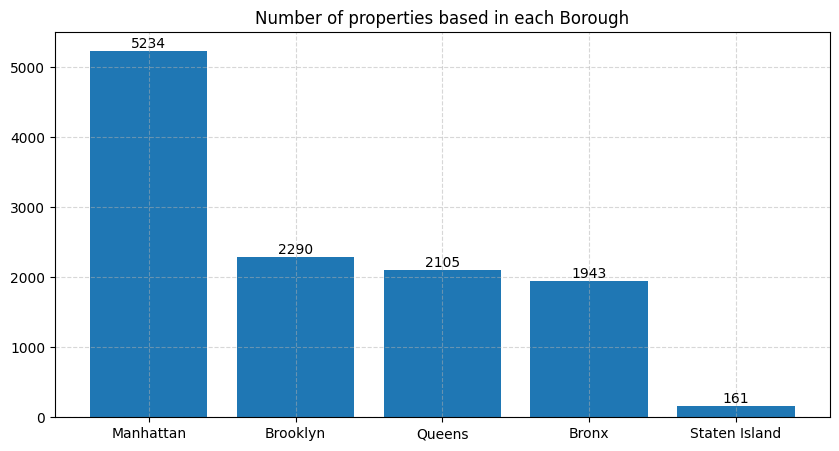

In [ ]:
fig, ax = plt.subplots(figsize=[10, 5])
bars = ax.bar(x=borough_counts.index, height=borough_counts.values)
ax.bar_label(bars)
ax.tick_params(axis='x')
ax.tick_params(axis='y')
plt.title("Number of properties based in each Borough")
plt.grid(linestyle="dashed", alpha=0.5)
plt.show()

####**NYC Building Identification Number (BIN)**:

Self-reported seven-digit building identification number.

This is another id data. We have Property Id for each building. So dropping this column

In [ ]:
#Checking unique values
data['NYC Building Identification Number (BIN)'].nunique()

11506

In [ ]:
data['NYC Building Identification Number (BIN)'].value_counts()

Not Available      151
4455438             13
4455379             13
4451548              8
4451568              6
                  ... 
1045285              1
1045286;1802518      1
1045287              1
1045288              1
3055969              1
Name: NYC Building Identification Number (BIN), Length: 11506, dtype: int64

In [ ]:
#Checking for null values
data['NYC Building Identification Number (BIN)'].isna().sum()

0

In [ ]:
#Droping the column
data.drop('NYC Building Identification Number (BIN)', axis=1, inplace=True)

####Address1, Address2, Postal Code, street number, street name:

In [ ]:
#Creating a df with all the address related columns
location = pd.DataFrame(data[['Address 1 (self-reported)','Address 2','Postal Code','Street Number','Street Name']])
location

,Address 1 (self-reported),Address 2,Postal Code,Street Number,Street Name
0,201/205 East 42nd st.,Not Available,10017,675,3 AVENUE
1,622 168th Street,Not Available,10032,180,FT WASHINGTON AVENUE
2,3975 Broadway,Not Available,10032,3975,BROADWAY
3,161 Fort Washington Ave,177 Fort Washington Ave,10032,161,FT WASHINGTON AVENUE
4,710 West 168th Street,Not Available,10032,193,FT WASHINGTON AVENUE
...,...,...,...,...,...
11741,24 Monroe Place,Not Available,11218,22,MONROE PLACE
11742,150 Joralemon Street,Not Available,11201,130,CLINTON STREET
11743,267 6th Street,Not Available,11215,NaN,NaN
11744,27 Prospect Park West,Not Available,11215,27,PROSPECT PARK WEST


In [ ]:
#calculating the percentage of null values in the dataset data2
data_nan = (location.isnull().sum() / len(location)) * 100

#creating a new dataframe with two columns, first shows the count of null values in each feature and the second shows the percentage
null_data = pd.DataFrame({'Null values count':location.isnull().sum(),'% Null values' :data_nan})

#As the dataset has 60 features, showing the 60 features and the null value info
null_data.sort_values('% Null values', ascending=False).head(5)

,Null values count,% Null values
Street Number,111,0.946050
Street Name,109,0.929004
Address 1 (self-reported),0,0.000000
Address 2,0,0.000000
Postal Code,0,0.000000


There are not many null values in the above columns. But Address 1, Address 2, Street Name and Street Number are all text values giving id info about the property. There is no usefull pattern in them for the model. So, keeping only Postal Code and dropping the rest. Borough and Postal Code info should be sufficient for location.

In [ ]:
data.drop(['Address 1 (self-reported)','Address 2','Street Number','Street Name'], axis=1, inplace=True)

####Postal Code
Checking Postal code if the data needs any cleaning. Postal code value is 5 digits as per the standard. But some postal codes have a 4 digit extension. We dont need these 4 digits so can strip them off. Also some of them have a '-' which can also be removed

In [ ]:
#Checking how many rows have postal code longer than 5 digits
postal_code = data[data['Postal Code'].apply(lambda x: len(x)>5)]
print(postal_code.shape)
postal_code.head()

(52, 53)


,Property Id,Postal Code,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA,Standalone Property,bbl_digit1,Tax Block,Tax Lot Number
410,5877227,112074037,Brooklyn,NaN,Multifamily Housing,Multifamily Housing,Multifamily Housing,240118,Not Available,Not Available,Not Available,Not Available,1975,2,100,Whole Building,Not Available,9,131.2,135.1,9.7,1,211.3,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,2.32203997E7,244429.2,8287707,2341135.4,2002.4,1233.3,769.1,240118,Not Available,Not Available,209.9,05/04/2017 03:44:13 PM,No,In Compliance,NaN,NaN,NaN,NaN,NaN,NaN,0,3,03769,0001
411,5877240,112074037,Brooklyn,153588.0,Multifamily Housing,Multifamily Housing,Multifamily Housing,178170,Not Available,Not Available,Not Available,Not Available,1975,1,100,Whole Building,Whole Building,8,131.7,135.5,10,1,213.5,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,1.71479998E7,180566.5,6309248.5,1781607.7,1496.3,910.8,585.5,178170,2405420,13500.7,212.2,05/01/2017 03:51:52 PM,Yes,In Compliance,40.667442,-73.897533,5.0,42.0,1156.0,East New York (Pennsylvania Ave) ...,0,3,03769,0001
412,5877235,112074037,Brooklyn,NaN,Multifamily Housing,Multifamily Housing,Multifamily Housing,59390,Not Available,Not Available,Not Available,Not Available,1975,1,100,Whole Building,Not Available,8,135.6,140.9,9.8,1.1,217.6,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,6072399.9,63920,1978458.4,579852.9,506.1,322.5,183.6,59390,Not Available,Not Available,212,05/01/2017 03:51:52 PM,Yes,In Compliance,NaN,NaN,NaN,NaN,NaN,NaN,0,3,03770,0022
522,5499315,10005-2836,Manhattan,1617206.0,Office,"Data Center, Financial Office, Office, Other -...",Office,1345237,Financial Office,170224,Data Center,58978,1989,1,100,Whole Building,Whole Building,76,117.7,119.3,26.4,0,317.7,Not Available,Not Available,Not Available,Not Available,Not Available,4.15504043E7,2216900,22169,147566239.8,4.28850013E7,16570.7,117.8,16453,1625483,37796.1,23.25,317.2,06/12/2017 10:29:39 AM,No,In Compliance,NaN,NaN,NaN,NaN,NaN,NaN,1,1,00040,0003
610,2605947,100381836,Manhattan,208576.0,Multifamily Housing,Multifamily Housing,Multifamily Housing,223674,Not Available,Not Available,Not Available,Not Available,1981,1,100,Whole Building,Not Available,21,109.4,116.2,6.1,1,165.8,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,19632338,212916,4834324.8,1375016.1,1491.4,1042.8,448.6,223674,Not Available,Not Available,160,04/17/2017 11:51:33 AM,Yes,In Compliance,40.708179,-74.004620,1.0,1.0,1501.0,Battery Park City-Lower Manhattan ...,1,1,00095,0027


In [ ]:
#Getting the first 4 digits of the postal code values
data['Postal Code'] = data['Postal Code'].apply(lambda x: x[:5])

In [ ]:
#checking again for postal code > 5 digits
postal_code = data[data['Postal Code'].apply(lambda x: len(x)>5)]
print(postal_code.shape)

(0, 53)


In [ ]:
#Checking to see if any of the postal codes are less than 5 digits
data[data['Postal Code'].apply(lambda x:len(str(x)) != 5) == True]

,Property Id,Postal Code,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA,Standalone Property,bbl_digit1,Tax Block,Tax Lot Number
10647,5832578,1137,Queens,78650.0,Multifamily Housing,Multifamily Housing,Multifamily Housing,91758,Not Available,Not Available,Not Available,Not Available,1937,1,100,Whole Building,Not Available,Not Available,89.3,Not Available,Not Available,Not Available,Not Available,Not Available,624615.5,Not Available,Not Available,Not Available,Not Available,6351300.2,Not Available,1220711.3,Not Available,569,383.7,185.3,91758,5909.5,64.4,121.3,04/26/2017 03:59:42 PM,Yes,In Compliance,NaN,NaN,NaN,NaN,NaN,NaN,1,4,03293,0074


In [ ]:
#updating the above postal code value based on the borough
data.iloc[10647, data.columns.get_loc('Postal Code')] = '11375'

####**DOF Gross Floor Area:**, Property GFA

Dropping this column as there is another column that gives the Gross Floor Area information specific to each property 'Property GFA - Self-Reported (ft²)'

In [ ]:
#checking the unique values
data['DOF Gross Floor Area'].nunique()

9296

In [ ]:
data['DOF Gross Floor Area'].value_counts()

60000.0      50
54000.0      41
50400.0      33
72000.0      28
1368870.0    26
             ..
515755.0      1
198347.0      1
136733.0      1
95380.0       1
57824.0       1
Name: DOF Gross Floor Area, Length: 9296, dtype: int64

In [ ]:
#checking the null values
data['DOF Gross Floor Area'].isna().sum()

105

In [ ]:
#dropping the column
data.drop('DOF Gross Floor Area', axis=1, inplace=True)

####**Property Use Types:**

- Primary Property Type - Self Selected: Self-reported property type options available in Portfolio Manager.
- List of All Property Use Types at Property: A comma delimited list of all the property types for a single property, in alphabetical order.
- Largest Property Use Type: The name of the Property Type (ex: Office) that has the largest Gross Floor Area (GFA) for that property.
- 2nd Largest Property Use Type: The name of the Property Type (ex: Office) that has the second largest GFA for that property.
- 3rd Largest Property Use Type: The name of the Property Type (ex: Office) that has the third largest GFA for that property.

In [ ]:
#Listing all the property types used
property_types = data['Primary Property Type - Self Selected'].value_counts()
property_types

Multifamily Housing                                 8684
Office                                              1316
Hotel                                                223
Other                                                181
Non-Refrigerated Warehouse                           180
Residence Hall/Dormitory                             108
College/University                                   103
Senior Care Community                                 99
Self-Storage Facility                                 98
Retail Store                                          90
K-12 School                                           86
Distribution Center                                   71
Mixed Use Property                                    70
Manufacturing/Industrial Plant                        57
Hospital (General Medical & Surgical)                 47
Parking                                               44
Medical Office                                        32
Supermarket/Grocery Store      

There are about 55 property types used, some of them are of similar category. So, grouping similar property types to reduce the number of categories of the property types and to simplify them. Using the below linked webpage to categorize the property types.

source link: https://www.nyc.gov/assets/finance/jump/hlpbldgcode.html#P

In [ ]:
#creating a dictionary to categorize the property types.
property_type_dict = {
    'Multifamily Housing':'Multifamily Housing',
    'Office':'Office',
    'Hotel':'Hotel',
    'Other':'Other',
    'Non-Refrigerated Warehouse':'Warehouse',
    'Residence Hall/Dormitory':'Hotel',
    'College/University':'Educational Facility',
    'Senior Care Community':'Healthcare Facility',
    'Self-Storage Facility':'Warehouse',
    'Retail Store':'Store Building',
    'K-12 School':'Educational Facility',
    'Distribution Center':'Warehouse',
    'Mixed Use Property':'Other',
    'Manufacturing/Industrial Plant':'Industrial Building',
    'Hospital (General Medical & Surgical)':'Healthcare Facility',
    'Parking':'Garage',
    'Medical Office':'Healthcare Facility',
    'Supermarket/Grocery Store':'Store Building',
    'Worship Facility':'Religious Facility',
    'Financial Office':'Office',
    'Other - Entertainment/Public Assembly':'Indoor Cultural Facility',
    'Refrigerated Warehouse':'Warehouse',
    'Other - Specialty Hospital':'Healthcare Facility',
    'Other - Lodging/Residential':'Hotel',
    'Other - Mall':'Store Building',
    'Wholesale Club/Supercenter':'Store Building',
    'Performing Arts':'Indoor Cultural Facility',
    'Other - Education':'Educational Facility',
    'Enclosed Mall':'Store Building',
    'Strip Mall':'Store Building',
    'Urgent Care/Clinic/Other Outpatient':'Healthcare Facility',
    'Museum':'Indoor Cultural Facility',
    'Social/Meeting Hall':'Indoor Cultural Facility',
    'Residential Care Facility':'Healthcare Facility',
    'Outpatient Rehabilitation/Physical Therapy':'Healthcare Facility',
    'Library':'Educational Facility',
    'Movie Theater':'Indoor Cultural Facility',
    'Automobile Dealership':'Store Building',
    'Repair Services (Vehicle, Shoe, Locksmith, etc.)':'Store Building',
    'Laboratory':'Healthcare Facility',
    'Data Center':'Other',
    'Other - Recreation':'Outdoor Facility',
    'Courthouse':'Office',
    'Restaurant':'Hotel',
    'Ice/Curling Rink':'Indoor Cultural Facility',
    'Mailing Center/Post Office':'Other',
    'Other - Technology/Science':'Office',
    'Pre-school/Daycare':'Educational Facility',
    'Food Service':'Hotel',
    'Convenience Store without Gas Station':'Store Building',
    'Other - Restaurant/Bar':'Hotel',
    'Fast Food Restaurant':'Hotel',
    'Swimming Pool':'Outdoor Facility',
    'Food Sales':'Hotel',
    'Personal Services (Health/Beauty, Dry Cleaning, etc.)':'Store Building',
    'Bar/Nightclub':'Hotel',
    'Vocational School':'Educational Facility',
    'Other - Utility':'Other',
    'Fire Station':'Other',
    'Energy/Power Station':'Industrial Building',
    'Bowling Alley':'Indoor Cultural Facility',
    'Adult Education':'Educational Facility',
    'Bank Branch':'Office',
    'Fitness Center/Health Club/Gym':'Healthcare Facility',
    'Ambulatory Surgical Center':'Healthcare Facility',
    'Other - Public Services':'Office',
    'Other - Services':'Other'
    }

Updating the property type categories in
- Primary Property Type - Self Selected
- Largest Property Use Type
- 2nd Largest Property Use Type
- 3rd Largest Property Use Type

In [ ]:
data['Primary Property Type - Self Selected'] = data['Primary Property Type - Self Selected'].replace(property_type_dict)
data['Largest Property Use Type'] = data['Largest Property Use Type'].replace(property_type_dict)
data['2nd Largest Property Use Type'] = data['2nd Largest Property Use Type'].replace(property_type_dict)
data['3rd Largest Property Use Type'] = data['3rd Largest Property Use Type'].replace(property_type_dict)

**List of All Property Use Types** at Property column can be dropped as it is redundant. Primary property type, largest, end largest, 3rd largest info should be sufficient

In [ ]:
#dropping List of all property types
data.drop('List of All Property Use Types at Property', axis=1, inplace=True)

In [ ]:
updated_property_types = data['Primary Property Type - Self Selected'].value_counts()
updated_property_types

Multifamily Housing         8684
Office                      1342
Warehouse                    361
Hotel                        343
Other                        257
Healthcare Facility          216
Educational Facility         207
Store Building               154
Industrial Building           57
Indoor Cultural Facility      45
Garage                        44
Religious Facility            20
Outdoor Facility               3
Name: Primary Property Type - Self Selected, dtype: int64

- Now we have 13 categories of Property types. These can be easily encoded for the model training.
- Almost 74% of the properties are of Multifamily Housing type.

Plotting a graph to see the count of properties in each category

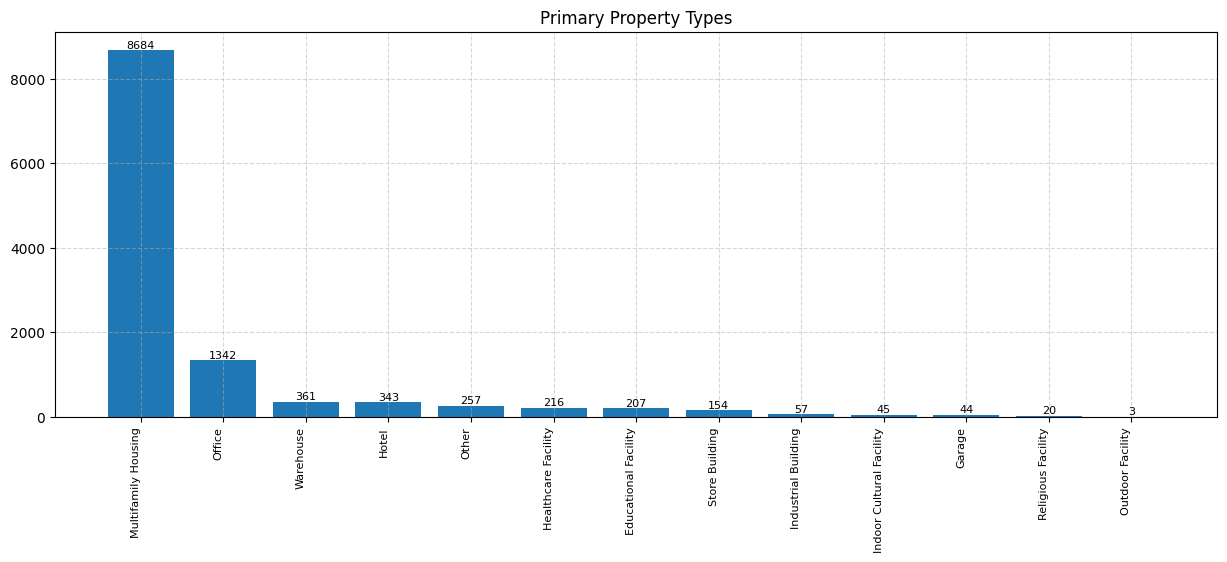

In [ ]:
fig, ax = plt.subplots(figsize=[15, 5])
bars = ax.bar(x=updated_property_types.index, height=updated_property_types.values)
ax.bar_label(bars,fontsize=8)
ax.tick_params(axis='x')
ax.tick_params(axis='y')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right',fontsize=8)
plt.title("Primary Property Types")
plt.grid(linestyle="dashed", alpha=0.5)
plt.show()

####Largest, 2nd largest and 3rd largest GFA:
- 'Largest Property Use Type - Gross Floor Area (ft²)': The GFA for the largest Property Type.
- '2nd Largest Property Use - Gross Floor Area (ft²)': The GFA for the second largest Property Type.
- '3rd Largest Property Use Type - Gross Floor Area (ft²)': The GFA for the third largest Property Type.

These columns are giving information about the gross floor area taken by the property/building based on the use of the property.

In [ ]:
#Checking the null values
print("Largest = ",data['Largest Property Use Type - Gross Floor Area (ft²)'].isna().sum())
print("2nd Largest = ",data['2nd Largest Property Use - Gross Floor Area (ft²)'].isna().sum())
print("3rd Largest = ",data['3rd Largest Property Use Type - Gross Floor Area (ft²)'].isna().sum())

Largest =  0
2nd Largest =  0
3rd Largest =  0


In [ ]:
data.sample(5)

,Property Id,Postal Code,Borough,Primary Property Type - Self Selected,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA,Standalone Property,bbl_digit1,Tax Block,Tax Lot Number
4490,5870139,10029,Manhattan,Multifamily Housing,Multifamily Housing,147590,Garage,19109,Not Available,Not Available,2011,1,100,Whole Building,Whole Building,98,44.8,46.4,4.2,0.3,78.5,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,4434528.1,47495.1,2180444,616528.3,437.9,235.5,202.3,147590,4228,28.65,77.9,04/28/2017 12:52:15 PM,No,In Compliance,40.796476,-73.946435,11.0,8.0,17402.0,East Harlem South ...,1,1,01616,0049
7086,3129093,10467,Bronx,Multifamily Housing,Multifamily Housing,74645,Not Available,Not Available,Not Available,Not Available,1925,1,100,Whole Building,Not Available,30,115,Not Available,4,0.1,Not Available,Not Available,Not Available,Not Available,7181699.6,Not Available,Not Available,373609.1,3809.8,1027119.3,295659.6,656.3,561,95.3,74645,Not Available,Not Available,145.6,05/01/2017 07:25:47 PM,Yes,In Compliance,40.872255,-73.866129,12.0,15.0,374.0,Williamsbridge-Olinville ...,1,2,04597,0021
4305,2957222,10028,Manhattan,Multifamily Housing,Multifamily Housing,159552,Healthcare Facility,20357,Store Building,15619,1987,1,100,Whole Building,Whole Building,13,117.9,119.7,12.7,0,213.5,Not Available,1.35914537E7,Not Available,Not Available,Not Available,Not Available,731575.4,7315.8,8737360.3,2488925.5,1858.3,1047.5,810.8,195528,8620.7,44.09,214.4,07/24/2017 12:54:27 PM,Yes,In Compliance,40.778674,-73.953613,8.0,5.0,14602.0,Yorkville ...,1,1,01532,0001
847,4412906,10013,Manhattan,Office,Office,73365,Healthcare Facility,11000,Not Available,Not Available,1925,1,100,Whole Building,Whole Building,1,34326.8,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,2891656566,Not Available,Not Available,4325384.3,Not Available,192403.1,0,192403.1,84365,Not Available,Not Available,41395.9,05/01/2017 07:43:09 PM,No,In Compliance,40.723903,-74.004690,2.0,3.0,37.0,SoHo-TriBeCa-Civic Center-Little Italy ...,1,1,00477,7501
3891,4402719,10021,Manhattan,Multifamily Housing,Multifamily Housing,52000,Not Available,Not Available,Not Available,Not Available,1929,1,100,Whole Building,Not Available,89,65.9,65.5,4.1,0.4,97.8,Not Available,355336.3,Not Available,Not Available,Not Available,Not Available,2323299.6,23233,746201,213353.9,219,149.8,69.2,52000,1885.1,36.25,98.9,04/26/2017 01:45:22 PM,Yes,In Compliance,40.768573,-73.959949,8.0,4.0,126.0,Lenox Hill-Roosevelt Island ...,1,1,01425,0029


It shows there are 0 null values in the GFA columns but if you see the data, the Null values are repesented as 'Not Available'. These need to changed to NaN.
We will replace 'Not Available' to NaN across the dataframe

In [ ]:
#replacng the 'Not Available' string to numpy NaN value
data.replace('Not Available',np.nan,inplace=True)

In [ ]:
#Checking for null values and percentage of null values again
print("Largest = ",data['Largest Property Use Type - Gross Floor Area (ft²)'].isna().sum())
print("2nd Largest = ",data['2nd Largest Property Use - Gross Floor Area (ft²)'].isna().sum(), data['2nd Largest Property Use - Gross Floor Area (ft²)'].isna().sum()/len(data)*100)
print("3rd Largest = ",data['3rd Largest Property Use Type - Gross Floor Area (ft²)'].isna().sum(), data['3rd Largest Property Use Type - Gross Floor Area (ft²)'].isna().sum()/len(data)*100)

Largest =  1
2nd Largest =  7992 68.11557146509844
3rd Largest =  10249 87.35191340663087



2nd largest has 68% of null values and 3rd largest has 87% null values. We can impute them using mean. But before that check for any outliers in this data.

The data here is numerical but the column datatype is object. So converting to float datatype

In [ ]:
# creating a list of features which are currently object datatype but have numerical data
convert_to_float = ['Largest Property Use Type - Gross Floor Area (ft²)', '2nd Largest Property Use - Gross Floor Area (ft²)', '3rd Largest Property Use Type - Gross Floor Area (ft²)',
                      'Site EUI (kBtu/ft²)', 'Weather Normalized Site EUI (kBtu/ft²)', 'Weather Normalized Site Electricity Intensity (kWh/ft²)','Weather Normalized Site Natural Gas Intensity (therms/ft²)',
                      'Weather Normalized Source EUI (kBtu/ft²)','Fuel Oil #1 Use (kBtu)','Fuel Oil #2 Use (kBtu)','Fuel Oil #4 Use (kBtu)','Fuel Oil #5 & 6 Use (kBtu)','Diesel #2 Use (kBtu)',
                      'District Steam Use (kBtu)','Natural Gas Use (kBtu)','Weather Normalized Site Natural Gas Use (therms)','Electricity Use - Grid Purchase (kBtu)',
                      'Weather Normalized Site Electricity (kWh)','Total GHG Emissions (Metric Tons CO2e)','Direct GHG Emissions (Metric Tons CO2e)','Indirect GHG Emissions (Metric Tons CO2e)',
                      'Water Use (All Water Sources) (kgal)','Water Intensity (All Water Sources) (gal/ft²)','Source EUI (kBtu/ft²)']

# Using for loop to loop through the list of features and convert them to float datatype
for col in convert_to_float:
  data[col] = data[col].astype(float)

Checking for outliers in the Largest, 2nd largest and 3rd largest property types using box plot

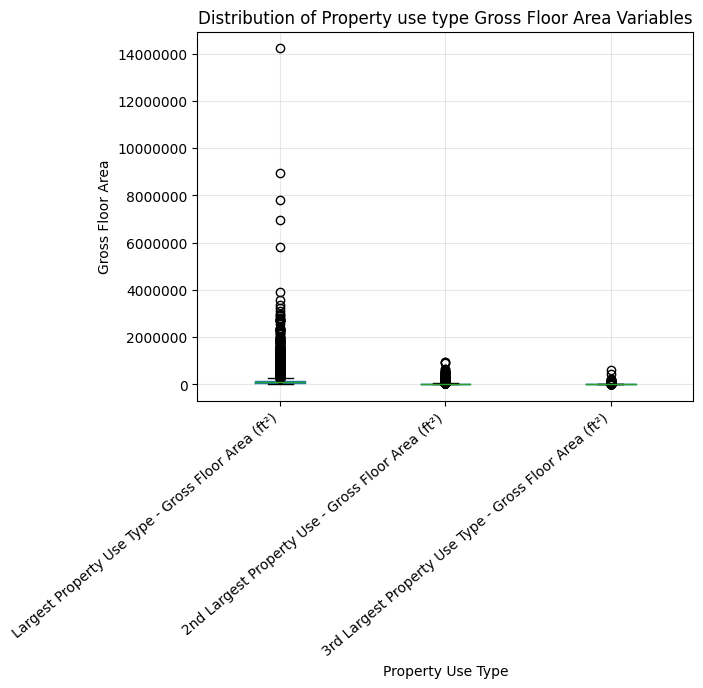

In [ ]:
data_to_plot = data[['Largest Property Use Type - Gross Floor Area (ft²)','2nd Largest Property Use - Gross Floor Area (ft²)','3rd Largest Property Use Type - Gross Floor Area (ft²)']]
ax = plt.subplots()
data_to_plot = data[['Largest Property Use Type - Gross Floor Area (ft²)','2nd Largest Property Use - Gross Floor Area (ft²)','3rd Largest Property Use Type - Gross Floor Area (ft²)']]
data_to_plot.boxplot()
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Property Use Type')
plt.ylabel('Gross Floor Area')
plt.title('Distribution of Property use type Gross Floor Area Variables')
plt.xticks(rotation=40, ha='right')
plt.grid(alpha=0.3)
plt.show()

####Outliers function
Creating a function that takes the column name and checs for any outliers using the IQR method. It prints the Q1, Q2, IQR, LL, UL, number of outliers and % of outliers. Also returns the LL and UL values, which can be used for treating the outliers

In [ ]:
#Function to check for outliers
def check_outliers(col):
  #outliers in Largest Property Use Type - Gross Floor Area (ft²)
  Q1 = data[col].quantile(0.25)
  Q3 = data[col].quantile(0.75)

  IQR = Q3 - Q1

  LL = Q1 - 1.5 * IQR
  UL = Q3 + 1.5 * IQR

  print(f"Q1: {Q1} | Q3: {Q3} | IQR: {IQR} | LL: {LL} | UL: {UL}")

  outlier_count_ul = data[data[col] > UL].shape[0]
  outlier_perc_ul = (outlier_count_ul * 100) / data.shape[0]

  outlier_count_ll = data[data[col] < LL].shape[0]
  outlier_perc_ll = (outlier_count_ll * 100) / data.shape[0]

  print(f"# of Outliers on the Higher Side: {outlier_count_ul} | % of Outliers on the Higher Side: {outlier_perc_ul}%")
  print(f"# of Outliers on the Lower Side: {outlier_count_ll} | % of Outliers on the Lower Side: {outlier_perc_ll}%")

  return LL, UL

Creating a function that takes a column name and plots a histogram and box plot. This will help us see the data distribution, skewness, kutosis, outliers

In [ ]:
def plot_col_distribution(col_name):
  plt.figure(figsize=(15,4))
  plt.subplot(1,2,1)
  sns.distplot(data[col_name])

  plt.subplot(1,2,2)
  sns.boxplot(data[col_name])
  print("The skewness for the original data is {}.".format(data[col_name].skew()))
  print("The kurtosis for the original data is {}.".format(data[col_name].kurt()))

Creating a function called zscore_transformation. This will transform the data in given column if the skewness and kurtosis are high using zscore. The scaled values are filled into a new column, so the original data is intact.

In [ ]:
#def zscore_transformation(col_name):
  #avg_LA = data[col_name].mean()
  #std_LA = data[col_name].std()
  #new_name = col_name + '_zscore'
  #data[new_name] = (data[col_name] - avg_LA)/std_LA
  #calling the plot_col_distribution function here to check the outcome of the transformation
  #plot_col_distribution(new_name)

In [ ]:
ll, ul = check_outliers('Largest Property Use Type - Gross Floor Area (ft²)')


Q1: 65171.5 | Q3: 152825.0 | IQR: 87653.5 | LL: -66308.75 | UL: 284305.25
# of Outliers on the Higher Side: 1249 | % of Outliers on the Higher Side: 10.645188783772266%
# of Outliers on the Lower Side: 0 | % of Outliers on the Lower Side: 0.0%


We can see the Largest property type has 10% of outliers on the upper side. 0 on the lower side.
Capping the outliers to the upper limit. Ignoring lower limit as there are no outliers there.

In [ ]:
data['Largest Property Use Type - Gross Floor Area (ft²)'] = np.where(data['Largest Property Use Type - Gross Floor Area (ft²)'] >= ul, ul, data['Largest Property Use Type - Gross Floor Area (ft²)'])


The skewness for the original data is 1.127708356874734.
The kurtosis for the original data is -4.715417685297041e-05.


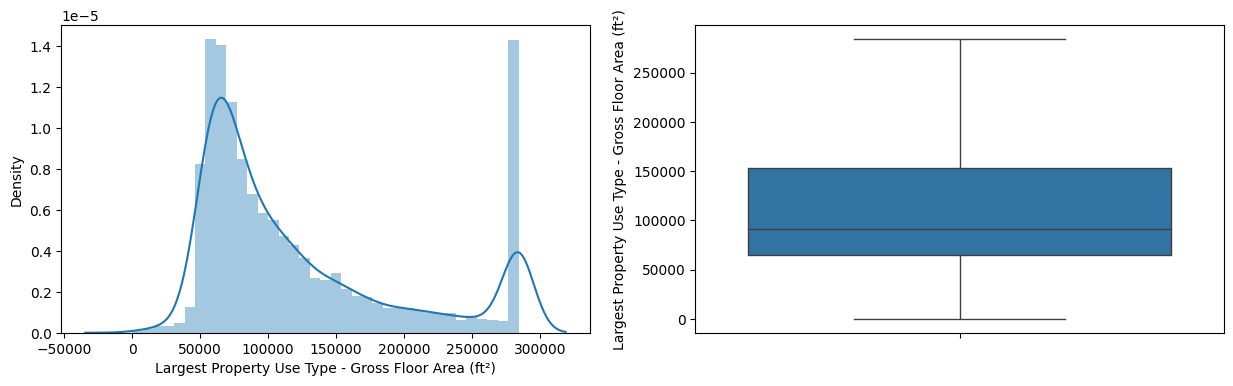

In [ ]:
#Checking the distribution and outliers
plot_col_distribution('Largest Property Use Type - Gross Floor Area (ft²)')

Skewness > 1; data is right skewed

Kurtosis < 3; Its a platykurtic as the tails are short and thin

Checking outliers in '2nd Largest Property Use - Gross Floor Area (ft²)'

In [ ]:
ll_2nd, ul_2nd = check_outliers('2nd Largest Property Use - Gross Floor Area (ft²)')

Q1: 4000.0 | Q3: 20000.0 | IQR: 16000.0 | LL: -20000.0 | UL: 44000.0
# of Outliers on the Higher Side: 386 | % of Outliers on the Higher Side: 3.2898661893803802%
# of Outliers on the Lower Side: 0 | % of Outliers on the Lower Side: 0.0%


THere are 3.28% outliers on the upper side. Treating them by capping with the upper limit value

In [ ]:
data['2nd Largest Property Use - Gross Floor Area (ft²)'] = np.where(data['2nd Largest Property Use - Gross Floor Area (ft²)'] >= ul_2nd, ul_2nd, data['2nd Largest Property Use - Gross Floor Area (ft²)'])


The skewness for the original data is 1.1595810553816255.
The kurtosis for the original data is 0.07849973315621339.


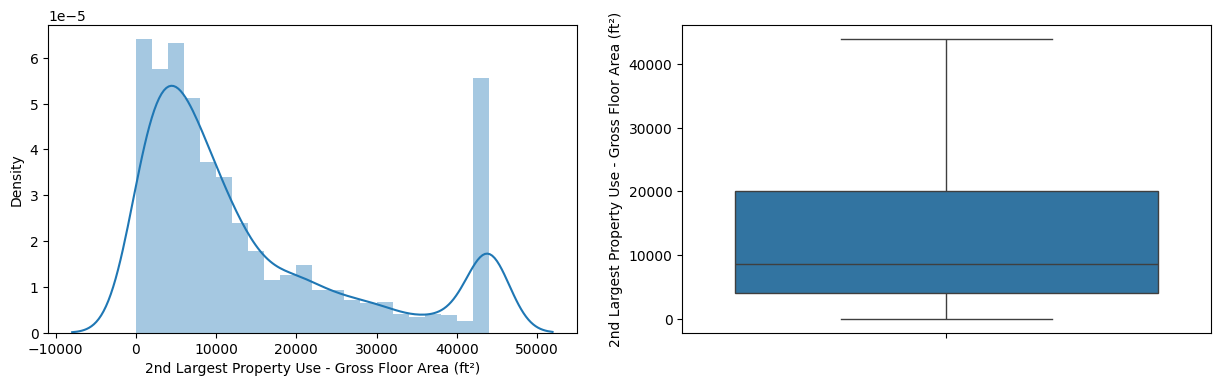

In [ ]:
#Checking the distribution and outliers
plot_col_distribution('2nd Largest Property Use - Gross Floor Area (ft²)')

Skewness > 1; data is right skewed

Kurtosis < 3; Its a platykurtic as the tails are short and thin

Checking outliers for '3rd Largest Property Use Type - Gross Floor Area (ft²)'

In [ ]:
ll_3rd, ul_3rd = check_outliers('3rd Largest Property Use Type - Gross Floor Area (ft²)')

Q1: 1720.75 | Q3: 12000.0 | IQR: 10279.25 | LL: -13698.125 | UL: 27418.875
# of Outliers on the Higher Side: 143 | % of Outliers on the Higher Side: 1.218784624563198%
# of Outliers on the Lower Side: 0 | % of Outliers on the Lower Side: 0.0%


In [ ]:
#capping the 1.2% outliers
data['3rd Largest Property Use Type - Gross Floor Area (ft²)'] = np.where(data['3rd Largest Property Use Type - Gross Floor Area (ft²)'] >= ul_3rd, ul_3rd, data['3rd Largest Property Use Type - Gross Floor Area (ft²)'])


The skewness for the original data is 1.1674685872974133.
The kurtosis for the original data is 0.18425136398373887.


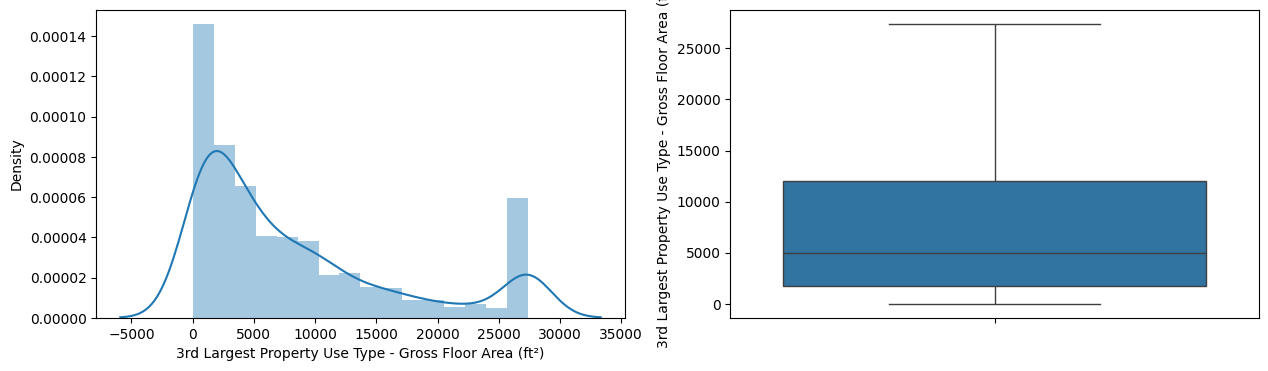

In [ ]:
plot_col_distribution('3rd Largest Property Use Type - Gross Floor Area (ft²)')

Skewness > 1; data is right skewed

Kurtosis < 3; Its a platykurtic as the tails are short and thin

####Imputing Null values in Largest, 2nd largest and 3rd largest GFA and use types

As the outliers are treated, Checking to see if any null values in the Largest, 2nd Largest and 3rd Largest GFA data and imputing with mean

In [ ]:
print(data['Largest Property Use Type - Gross Floor Area (ft²)'].isna().sum(), np.round(data['Largest Property Use Type - Gross Floor Area (ft²)'].isna().sum()/data.shape[0]*100, 2))
print(data['2nd Largest Property Use - Gross Floor Area (ft²)'].isna().sum(), np.round(data['2nd Largest Property Use - Gross Floor Area (ft²)'].isna().sum()/data.shape[0]*100, 2))
print(data['3rd Largest Property Use Type - Gross Floor Area (ft²)'].isna().sum(), np.round(data['3rd Largest Property Use Type - Gross Floor Area (ft²)'].isna().sum()/data.shape[0]*100, 2))

1 0.01
7992 68.12
10249 87.35


The number of null values in 2nd and 3rd largest columns are very high. 68% in 2nd largest and 87% in 3rd largest. Its not recommended to impute them using mean. So imputing Largest property ue type GFA with mean for now. I may drop the other two cols later, but for now leaving them as it is

In [ ]:
#imputing the null value with mean
data['Largest Property Use Type - Gross Floor Area (ft²)'].fillna(data['Largest Property Use Type - Gross Floor Area (ft²)'].mean(), inplace=True)

In [ ]:
data['Largest Property Use Type - Gross Floor Area (ft²)'].isna().sum()

0

In [ ]:
#Checking the null values in the 3 Property use type columns as well
print(data['Largest Property Use Type'].isna().sum(), np.round(data['Largest Property Use Type'].isna().sum()/data.shape[0]*100, 2))
print(data['2nd Largest Property Use Type'].isna().sum(), np.round(data['2nd Largest Property Use Type'].isna().sum()/data.shape[0]*100, 2))
print(data['3rd Largest Property Use Type'].isna().sum(), np.round(data['3rd Largest Property Use Type'].isna().sum()/data.shape[0]*100, 2))

1 0.01
7992 68.12
10249 87.35


Here also, leaving the 2nd and 3rd largest columns as is. Filling the null value in the Largest property use type to other

In [ ]:
data[data['Largest Property Use Type'].isna() == True]

,Property Id,Postal Code,Borough,Primary Property Type - Self Selected,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA,Standalone Property,bbl_digit1,Tax Block,Tax Lot Number
108,3615313,10065,Manhattan,Other,NaN,121596.134397,NaN,NaN,NaN,NaN,1940,8,100,Whole Building,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,529813424.5,20965612.6,221463.1,466575477.2,134297837.0,79590.5,1113.6,78476.9,3465563,NaN,NaN,NaN,04/10/2017 03:13:55 PM,No,In Compliance,NaN,NaN,NaN,NaN,NaN,NaN,0,1,01440,0049


In [ ]:
data.iloc[108,4] = 'Other'

####Property GFA

- Outliers detection and treatment
- Check for nul values

In [ ]:
#checking null values
data['Property GFA - Self-Reported (ft²)'].isna().sum()

0

In [ ]:
#checking outliers
ll_pgfa, ul_pgfa = check_outliers('Property GFA - Self-Reported (ft²)')

Q1: 66976.0 | Q3: 158195.0 | IQR: 91219.0 | LL: -69852.5 | UL: 295023.5
# of Outliers on the Higher Side: 1257 | % of Outliers on the Higher Side: 10.713372538992585%
# of Outliers on the Lower Side: 0 | % of Outliers on the Lower Side: 0.0%


10% outliers on the upper side. capping them with the upper limit

In [ ]:
#capping the outliers
data['Property GFA - Self-Reported (ft²)'] = np.where(data['Property GFA - Self-Reported (ft²)'] >= ul_pgfa, ul_pgfa, data['Property GFA - Self-Reported (ft²)'])


The skewness for the original data is 1.1370435525928864.
The kurtosis for the original data is 0.003967470120554317.


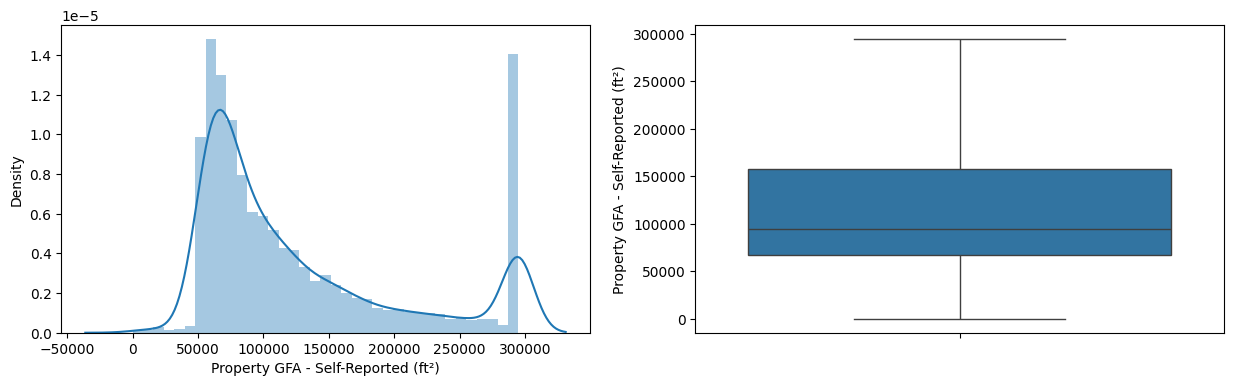

In [ ]:
#plotting the distribution
plot_col_distribution('Property GFA - Self-Reported (ft²)')

Skewness > 1; data is right skewed

Kurtosis < 3; Its a platykurtic as the tails are short and thin

####Year built

This is the year in which your property was constructed. If your property has undergone a complete renovation that included gutting and rebuilding the interior, then you can indicate the date of this renovation as the year built. If you don't know the exact year the property was built, enter an estimate.

In [ ]:
#checking null values
data['Year Built'].nunique()

156

In [ ]:
data['Year Built'].value_counts()

1928    417
1927    412
1929    389
1930    369
1931    327
       ... 
1867      1
1875      1
1874      1
1860      1
2019      1
Name: Year Built, Length: 156, dtype: int64

In [ ]:
#checking statistical info for the Year built col
data['Year Built'].describe()

count    11733.000000
mean      1948.765789
std         30.546972
min       1600.000000
25%       1927.000000
50%       1941.000000
75%       1966.000000
max       2019.000000
Name: Year Built, dtype: float64

In [ ]:
#checking the rows where year built is > 1900
year_after_1900 = data[data['Year Built']>1900]
print(year_after_1900.shape[0])
print(np.round(year_after_1900.shape[0]/data.shape[0]*100,2))

11425
97.37


In [ ]:
#checkingt the rows where year built is < 1900
year_before_1900 = data[data['Year Built']<1900]
print(year_before_1900.shape[0])
print(np.round(year_before_1900.shape[0]/data.shape[0]*100,2))

136
1.16


The min year is showing as 1600, if we check the rows where year built is before 1900, there are 136 such rows, which is only 1.16% of the data. 97.37% of the data is after 1900.
Its good to delete these rows as it will create imbalance in the data.

In [ ]:
#dropping the row where year built < 1900
data = data[data['Year Built']>1900]

####Number of Buildings - Self-reported

Number of Buildings indicates the total number of buildings that are located on a multi-building property. You enter this value into Portfolio Manager whenever you create a multi-building property. Please note that this value is not the number of buildings that have been individually benchmarked on a multi-building property. For example, you may operate a large university campus with 85 buildings. When you benchmark your property you indicate that there are 85 buildings, but you may only have building-level data to track 4 individual buildings on your campus. In this case, the Number of Buildings is still listed as 85, as you entered it.

Source Link: https://data.cityofnewyork.us/Environment/NYC-Building-Energy-and-Water-Data-Disclosure-for-/5zyy-y8am/about_data


The above description indicates that this data can be baised as all the number of buildings listed might not be benchmarked for energy star score.

In [ ]:
data['Number of Buildings - Self-reported'].value_counts()

1      10968
2        209
3         75
4         34
5         15
8         14
12        13
6         12
0         11
10         9
7          8
9          6
35         4
16         3
14         3
18         2
11         2
30         2
15         2
24         2
19         2
22         2
33         2
17         2
37         1
25         1
68         1
83         1
62         1
98         1
13         1
155        1
131        1
107        1
52         1
161        1
126        1
140        1
91         1
21         1
45         1
49         1
48         1
60         1
32         1
29         1
28         1
Name: Number of Buildings - Self-reported, dtype: int64

In [ ]:
10970/data.shape[0]*100

96.01750547045953

The data in Number of buildings is not balanced. 96% of the data is for single building. Only 4% of data gives info about multiple buildings. Also the standalone building information is alreagy captured in the standalone column. So this column is redundant. It can be dropped.

In [ ]:
#Dropping Number of buildings col
data.drop('Number of Buildings - Self-reported', axis=1, inplace=True)

####Occupancy:


Occupancy is the percentage of your property’s Gross Floor Area (GFA) that is occupied and operational. This is a measure of the building’s occupancy/use, it is not connected to a building’s “Maximum Occupancy.” The value you enter for occupancy will not affect your ENERGY STAR Score or any other metrics. Your Score is based on your specific Use Details (Number of Workers, Computers, etc) and you need to update your Use Details to accurately reflect the activity at your property.

Source Link: https://data.cityofnewyork.us/Environment/NYC-Building-Energy-and-Water-Data-Disclosure-for-/5zyy-y8am/about_data

In [ ]:
#checking null values
data['Occupancy'].isna().sum()

0

In [ ]:
data['Occupancy'].value_counts()

100    10595
95       379
90       199
80        61
85        47
0         32
75        31
70        20
40        12
50        11
60        10
65         7
25         5
30         5
10         4
5          4
55         1
45         1
20         1
Name: Occupancy, dtype: int64

In [ ]:
#calculating %ge of rows that are 100% occupied
10595/data.shape[0]*100

92.73522975929978

92% of the data shows 100% occupancy. This column is also imbalanced. So it can be transformed to a binary column 'is_fully_occupied', which tells if the property has 100% occupancy or not.

In [ ]:
#creating 'is_fully_occupied' col and filling with dummy based on teh 100% occupancy rows
data['is_fully_occupied'] = pd.get_dummies(data.Occupancy.astype('object'))[100].astype(int)

In [ ]:
data.sample(5)

,Property Id,Postal Code,Borough,Primary Property Type - Self Selected,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA,Standalone Property,bbl_digit1,Tax Block,Tax Lot Number,is_fully_occupied
9696,5837730,11104,Queens,Multifamily Housing,Multifamily Housing,59626.0,NaN,NaN,NaN,NaN,1931,100,Whole Building,NaN,80,80.0,85.8,3.0,0.1,108.3,NaN,3790584.0,NaN,NaN,NaN,NaN,348080.0,3480.8,630948.5,176079.8,358.3,299.8,58.6,59626.0,4952.9,83.07,103.6,05/01/2017 10:14:15 PM,No,In Compliance,NaN,NaN,NaN,NaN,NaN,NaN,1,4,00195,0044,1
1719,2695147,10001,Manhattan,Office,Office,59151.0,Warehouse,20000.0,Store Building,18849.0,1930,100,Whole Building,Whole Building,96,46.7,46.7,9.8,0.0,118.3,NaN,1380110.5,NaN,NaN,NaN,NaN,943.0,11.3,3751639.4,1076735.9,450.6,102.5,348.2,110000.0,2947.3,26.79,119.8,03/20/2017 11:41:32 AM,No,In Compliance,40.745694,-73.988664,5.0,3.0,76.0,Midtown-Midtown South ...,1,1,00830,0062,1
4199,4036562,10028,Manhattan,Multifamily Housing,Multifamily Housing,62740.0,Garage,8096.0,Store Building,5924.0,1987,100,Whole Building,NaN,NaN,105.4,111.6,10.4,0.8,191.2,NaN,0.0,NaN,0.0,NaN,NaN,4715170.7,52294.0,2520903.6,712938.8,484.4,250.4,233.9,68664.0,NaN,NaN,187.4,05/01/2017 02:58:14 PM,Yes,In Compliance,40.776367,-73.957857,8.0,5.0,140.0,Upper East Side-Carnegie Hill ...,1,1,01510,0020,1
5254,3135844,10040,Manhattan,Multifamily Housing,Multifamily Housing,51070.0,NaN,NaN,NaN,NaN,1927,100,Whole Building,Whole Building,41,127.1,136.3,5.0,0.0,173.9,NaN,NaN,5440105.8,NaN,NaN,NaN,157438.3,1574.2,895423.7,254334.4,501.0,417.9,83.1,51070.0,5700.2,111.61,165.9,04/29/2017 08:07:25 PM,Yes,In Compliance,40.862563,-73.926509,12.0,10.0,285.0,Washington Heights North ...,1,1,02174,0211,1
4390,4036569,10128,Manhattan,Multifamily Housing,Multifamily Housing,279805.0,Garage,44000.0,Office,7561.0,1986,100,Whole Building,Whole Building,NaN,144.7,150.8,10.5,1.1,233.3,NaN,0.0,NaN,0.0,NaN,NaN,30893673.6,330567.8,10745179.9,3027215.7,2638.1,1640.9,997.1,287756.0,29093.1,101.10,230.0,05/01/2017 02:58:14 PM,Yes,In Compliance,40.779301,-73.944680,8.0,5.0,152.0,Yorkville ...,1,1,01571,0022,1


In [ ]:
#Dropping the Occupancy column
data.drop('Occupancy', axis=1, inplace=True)

####Site EUI:
The Site Energy Use divided by the property square foot.

Energy use intensity as calculated by Portfolio Manager at the property site in kBtus per gross square foot (kBtu/ft2), for the reporting year.

EUI is expressed as energy per square foot or meter per year. It is calculated by dividing the total energy consumed by the building in one year by the total gross floor area of the building. EUI is expressed as thousands of British thermal units used per square foot per year (kBtu/sq. ft./year)

Source link: https://aiacalifornia.org/what-you-can-do-right-now/energy-use-intensity-eui/#:~:text=EUI%20is%20expressed%20as%20energy,per%20year%20(kBtu/sq.

The above article states that EUI is a sum of all the different types of energy consumed by the property, divided by gross floor area. In the data set there are 8 different features relating to energy consumption. All of these features have the same kBtu unit.
- Fuel Oil #1 Use (kBtu)
- Fuel Oil #2 Use (kBtu)
- Fuel Oil #4 Use (kBtu)
- Fuel Oil #5 & 6 Use (kBtu)
- Diesel #2 Use (kBtu)
- Natural Gas Use (kBtu)
- District Steam Use (kBtu)
- Electricity Use - Grid Purchase (kBtu)

All these 8 features have more missing values compared to 'Site EUI (kBtu/ft2)'
As we already have the calculated Site EUI for each property, the rest of the features are just redundant and can be dropped.

In [ ]:
data.drop(['Fuel Oil #1 Use (kBtu)','Fuel Oil #2 Use (kBtu)','Fuel Oil #4 Use (kBtu)','Fuel Oil #5 & 6 Use (kBtu)','Diesel #2 Use (kBtu)',
            'District Steam Use (kBtu)','Natural Gas Use (kBtu)','Electricity Use - Grid Purchase (kBtu)'], axis=1, inplace=True)


In [ ]:
data.shape

(11425, 42)

In [ ]:
#Checking null values
data['Site EUI (kBtu/ft²)'].isna().sum()

157

In [ ]:
#checking outliers
ll_site_eui, ul_site_eui = check_outliers('Site EUI (kBtu/ft²)')

Q1: 62.0 | Q3: 97.5 | IQR: 35.5 | LL: 8.75 | UL: 150.75
# of Outliers on the Higher Side: 609 | % of Outliers on the Higher Side: 5.330415754923414%
# of Outliers on the Lower Side: 197 | % of Outliers on the Lower Side: 1.724288840262582%


In [ ]:
#capping the upper and lower outliers
data['Site EUI (kBtu/ft²)'] = np.where(data['Site EUI (kBtu/ft²)'] >= ul_site_eui, ul_site_eui, data['Site EUI (kBtu/ft²)'])
data['Site EUI (kBtu/ft²)'] = np.where(data['Site EUI (kBtu/ft²)'] <= ll_site_eui, ll_site_eui, data['Site EUI (kBtu/ft²)'])

The skewness for the original data is 0.15914056727451592.
The kurtosis for the original data is 0.06962307447985916.


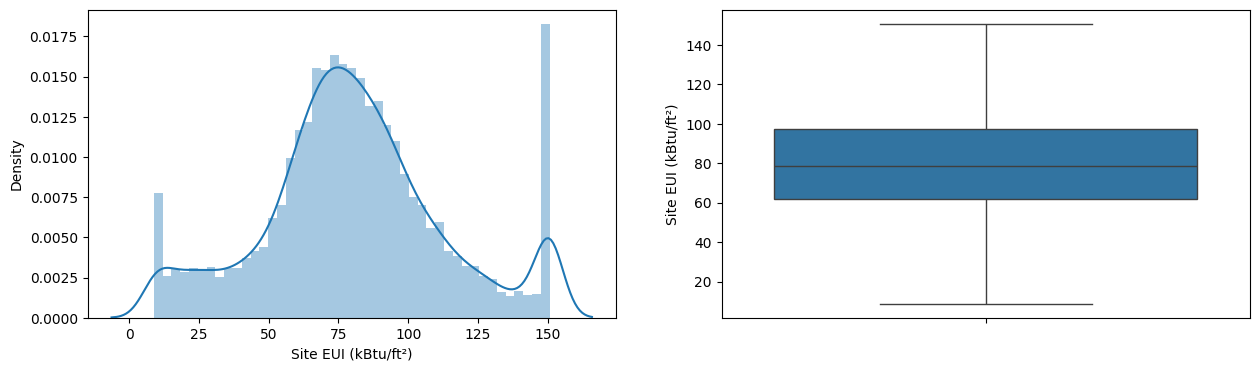

In [ ]:
#plotting the distribution
plot_col_distribution('Site EUI (kBtu/ft²)')

Skewness is 0.15 which is nearly symmetric
Kurtosis is 0.06, which is < 3, so the curve is platykurtic

There are 157 null values in this col. We will impute them with mean

In [ ]:
#imputing the null values with mean
data['Site EUI (kBtu/ft²)'].fillna(np.round(data['Site EUI (kBtu/ft²)'].mean(), 1), inplace=True)

####Metered Areas (Energy), Metered Areas (Water):

Metered Areas (Energy):Metered Areas is a designation of what areas within your building are covered by your energy and water meters.

Metered Areas (Water):Metered Areas is a designation of what areas within your building are covered by your energy and water meters.

These columns are just giving info about areas that are covered by meters. These can be dropped as they do not

In [ ]:
data['Metered Areas  (Water)'].value_counts()

Whole Building                            6933
Combination of common and tenant areas      10
Common areas only                            7
Another configuration                        5
Tenant areas only                            2
Tenant areas (all energy loads)              1
Name: Metered Areas  (Water), dtype: int64

In [ ]:
data['Metered Areas (Energy)'].value_counts()

Whole Building                                                                                          11333
Another configuration                                                                                      26
Common areas only                                                                                           5
Common Area Cooling, Tenant Plug Load/Electricity, Tenant Cooling, Common Area Plug Load/Electricity        1
Tenant Plug Load/Electricity, Common Area Cooling, Tenant Cooling, Common Area Plug Load/Electricity        1
Tenant Cooling, Common Area Hot Water, Common Area Heating, Common Area Plug Load/Electricity               1
Tenant areas only                                                                                           1
Name: Metered Areas (Energy), dtype: int64

In [ ]:
11335/data.shape[0]*100

99.21225382932167

In [ ]:
6935/data.shape[0]*100

60.70021881838075

Here again data is imbalanced.
- 99% of the properties have whole building as metered area for energy.
- 60% have water meters.

As per the Energy star website, the important features required for Energy star score calculation are:
- Property type
- Gross floor area
- location
- Property use type
- Occupancy
- Energy use (Site EUI, Source EUI)
- GHG Emission

Source link:
1. https://www.energystar.gov/buildings/benchmark/understand-metrics/score-criteria
2. https://energystar.my.site.com/PortfolioManager/s/article/What-are-the-requirements-to-get-an-ENERGY-STAR-score-1600088554501


These features do not give much info that relates to Energy Star Score calculation, so dropping them

In [ ]:
data.drop(['Metered Areas (Energy)','Metered Areas  (Water)'], axis=1, inplace=True)

####Weather Normalized features:

* Weather Normalized Site EUI (kBtu/ft²):
  The energy use your property would have consumed during 30-year average weather conditions. For example, if 2012 was a very hot year, then your Weather Normalized Site Energy may be lower than your Site Energy Use, because you would have used less energy if it had not been so hot. It can be helpful to use this weather normalized value to understand changes in energy when accounting for changes in weather. Weather Normalized Site EUI is also available (i.e. Weather Normalized Site Energy divided by property size or by flow through a water/wastewater treatment plant).
* Weather Normalized Site Electricity Intensity (kWh/ft²)
* Weather Normalized Site Natural Gas Intensity (therms/ft²)
* Weather Normalized Source EUI (kBtu/ft²): The source energy use your property would have consumed during 30-year average weather conditions. For example, if 2012 was a very hot year, then your Weather Normalized Source Energy may be lower than your Source Energy Use, because you would have used less energy if it had not been so hot. It can be helpful to use this weather normalized value to understand changes in energy when accounting for changes in weather. Weather Normalized Source EUI is also available (i.e. Weather Normalized Source Energy divided by property size or by flow through a water/wastewater treatment plant).
* Weather Normalized Site Natural Gas Use (therms)
* Weather Normalized Site Electricity (kWh)

Source Link: https://data.cityofnewyork.us/Environment/NYC-Building-Energy-and-Water-Data-Disclosure-for-/5zyy-y8am/about_data

More Info: https://colab.research.google.com/corgiredirector?site=https%3A%2F%2Fportfoliomanager.energystar.gov%2Fpdf%2Freference%2FClimate%2520and%2520Weather.pdf

Keeping Weather Normalized Site EUI (kBtu/ft²) and Weather Normalized Source EUI (kBtu/ft²). Dropping the other 4 columns as the Weather Normalized Site EUI and Source EUI are computed using the other 4 columns.


In [ ]:
data.drop(['Weather Normalized Site Electricity Intensity (kWh/ft²)','Weather Normalized Site Natural Gas Intensity (therms/ft²)',
            'Weather Normalized Site Natural Gas Use (therms)','Weather Normalized Site Electricity (kWh)'], axis=1, inplace=True)

Checking for null values and outliers in Weather Normalized Site EUI (kBtu/ft²)

In [ ]:
data['Weather Normalized Site EUI (kBtu/ft²)'].isna().sum()

1424

In [ ]:
#checking outliers
ll_wn_site_eui, ul_wn_site_eui = check_outliers('Weather Normalized Site EUI (kBtu/ft²)')

Q1: 65.3 | Q3: 102.4 | IQR: 37.10000000000001 | LL: 9.649999999999984 | UL: 158.05
# of Outliers on the Higher Side: 509 | % of Outliers on the Higher Side: 4.455142231947484%
# of Outliers on the Lower Side: 199 | % of Outliers on the Lower Side: 1.7417943107221006%


4.3% outliers on the higher side and 1.7% on the lower side. Imputing with their limits

In [ ]:
#capping the outleirs
data['Weather Normalized Site EUI (kBtu/ft²)'] = np.where(data['Weather Normalized Site EUI (kBtu/ft²)'] >= ul_wn_site_eui, ul_wn_site_eui, data['Weather Normalized Site EUI (kBtu/ft²)'])
data['Weather Normalized Site EUI (kBtu/ft²)'] = np.where(data['Weather Normalized Site EUI (kBtu/ft²)'] <= ll_wn_site_eui, ll_wn_site_eui, data['Weather Normalized Site EUI (kBtu/ft²)'])

The skewness for the original data is 0.1345593134508465.
The kurtosis for the original data is 0.09896582738332826.


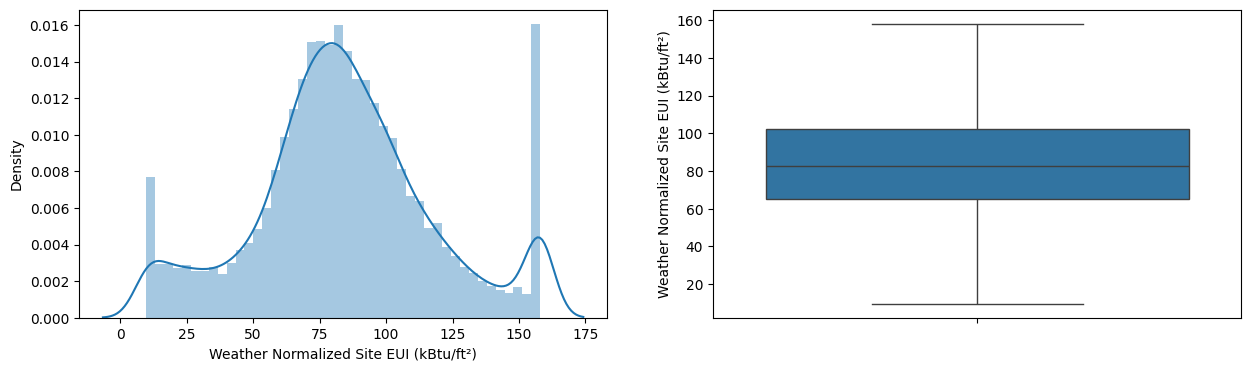

In [ ]:
#plotting distribution
plot_col_distribution('Weather Normalized Site EUI (kBtu/ft²)')

Skewness is 0.13, its almost symmetrical distribution
Kurtosis is < 3, so its a platykurtic

There are 1424 null values in this col. Imputing them with mean

In [ ]:
#imputing null values with mean
data['Weather Normalized Site EUI (kBtu/ft²)'].fillna(np.round(data['Weather Normalized Site EUI (kBtu/ft²)'].mean(), 1), inplace=True)

Checking for null values and outliers in Weather Normalized Source EUI (kBtu/ft²)

In [ ]:
LL_wn_source_eui, UL_wn_source_eui = check_outliers('Weather Normalized Source EUI (kBtu/ft²)')

Q1: 103.5 | Q3: 166.4 | IQR: 62.900000000000006 | LL: 9.149999999999991 | UL: 260.75
# of Outliers on the Higher Side: 644 | % of Outliers on the Higher Side: 5.636761487964989%
# of Outliers on the Lower Side: 79 | % of Outliers on the Lower Side: 0.6914660831509847%


5.6% higher side outliers and 0.69% lower side outliers. Imputing with limits

In [ ]:
data['Weather Normalized Source EUI (kBtu/ft²)'] = np.where(data['Weather Normalized Source EUI (kBtu/ft²)'] >= UL_wn_source_eui, UL_wn_source_eui, data['Weather Normalized Source EUI (kBtu/ft²)'])
data['Weather Normalized Source EUI (kBtu/ft²)'] = np.where(data['Weather Normalized Source EUI (kBtu/ft²)'] <= LL_wn_source_eui, LL_wn_source_eui, data['Weather Normalized Source EUI (kBtu/ft²)'])

The skewness for the original data is 0.4446141330569705.
The kurtosis for the original data is 0.056996479831083136.


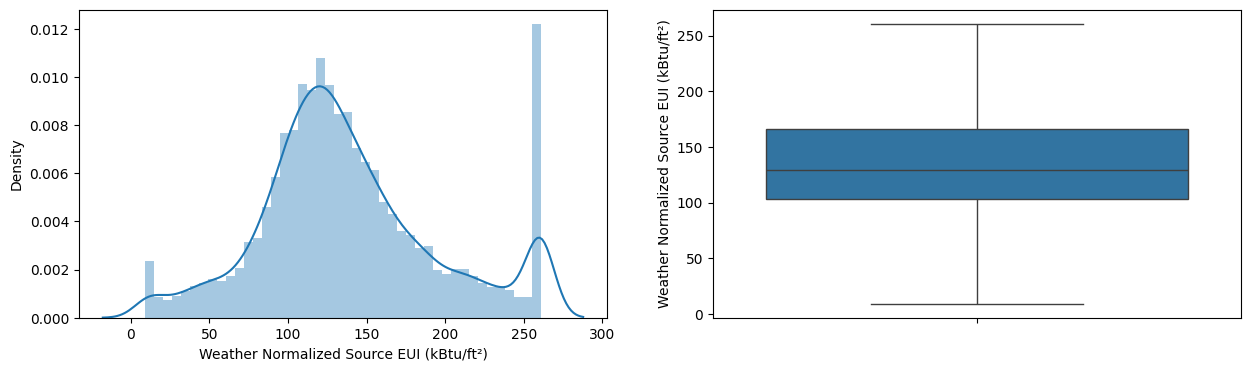

In [ ]:
#plotting the distribution
plot_col_distribution('Weather Normalized Source EUI (kBtu/ft²)')

Skewness is 0.4, its nearly symmetric
Kurtosis is 0.05 which is < 3 so its platykurtic

In [ ]:
#checking null values
data['Weather Normalized Source EUI (kBtu/ft²)'].isna().sum()

1424

In [ ]:
#imputing null values with mean
data['Weather Normalized Source EUI (kBtu/ft²)'].fillna(np.round(data['Weather Normalized Source EUI (kBtu/ft²)'].mean(),1), inplace=True)

####GHG Emissions:
Greenhouse Gas (GHG) Emissions are the carbon dioxide (CO2), methane (CH4), and nitrous oxide (N2O) gases released into the atmosphere as a result of energy consumption at the property. GHG emissions are expressed in carbon dioxide equivalent (CO2e), a universal unit of measure that combines the quantity and global warming potential of each greenhouse gas. Emissions are reported in four categories, each is available as a total amount in metric tons (Metric Tons CO2e) or as an intensity value in kilograms per square foot (kgCO2e/ft2): Direct Emissions – Direct Emissions are emissions associated with onsite fuel combustion (e.g. combustion of natural gas or fuel oil). Indirect Emissions – Indirect Emissions are emissions associated with purchases of electricity, district steam, district hot water, or district chilled water. These emissions occur at your utility’s plant, but they are a result of your property’s energy consumption and therefore contribute to your overall GHG footprint. Biomass Emissions– Biomass Emissions are emissions associated with biogenic fuels such as wood or biogas (captured methane). The only biomass fuel currently available in Portfolio Manager is wood. Biogenic fuels are combusted onsite, but do not contribute to Direct or Total Emissions. Total Emissions – Total Emissions is the sum of Direct Emissions and Indirect Emissions.

Source Link: https://data.cityofnewyork.us/Environment/NYC-Building-Energy-and-Water-Data-Disclosure-for-/5zyy-y8am/about_data

**Keeping Total GHG Emission feature and dropping Direct and Indirect as its just the sum of direct and indirect**


In [ ]:
#checking null values
print(data['Total GHG Emissions (Metric Tons CO2e)'].isna().sum())
print(data['Direct GHG Emissions (Metric Tons CO2e)'].isna().sum())
print(data['Indirect GHG Emissions (Metric Tons CO2e)'].isna().sum())

72
81
64


In [ ]:
#Dropping Direct and Indirect GHG Emission
data.drop(['Direct GHG Emissions (Metric Tons CO2e)','Indirect GHG Emissions (Metric Tons CO2e)'], axis=1, inplace=True)


In [ ]:
#checking out liers in Total GHG Emissions (Metric Tons CO2e)
LL_tot_ghg, UL_tot_ghg = check_outliers('Total GHG Emissions (Metric Tons CO2e)')

Q1: 328.7 | Q3: 905.5 | IQR: 576.8 | LL: -536.5 | UL: 1770.6999999999998
# of Outliers on the Higher Side: 1279 | % of Outliers on the Higher Side: 11.194748358862144%
# of Outliers on the Lower Side: 0 | % of Outliers on the Lower Side: 0.0%


11% outliers on the higher side and 0 on the lower side. Imputing higher side outliers with UL

In [ ]:
data['Total GHG Emissions (Metric Tons CO2e)'] = np.where(data['Total GHG Emissions (Metric Tons CO2e)'] >= UL_tot_ghg, UL_tot_ghg, data['Total GHG Emissions (Metric Tons CO2e)'])

The skewness for the original data is 1.0616354062338293.
The kurtosis for the original data is -0.0716336497839376.


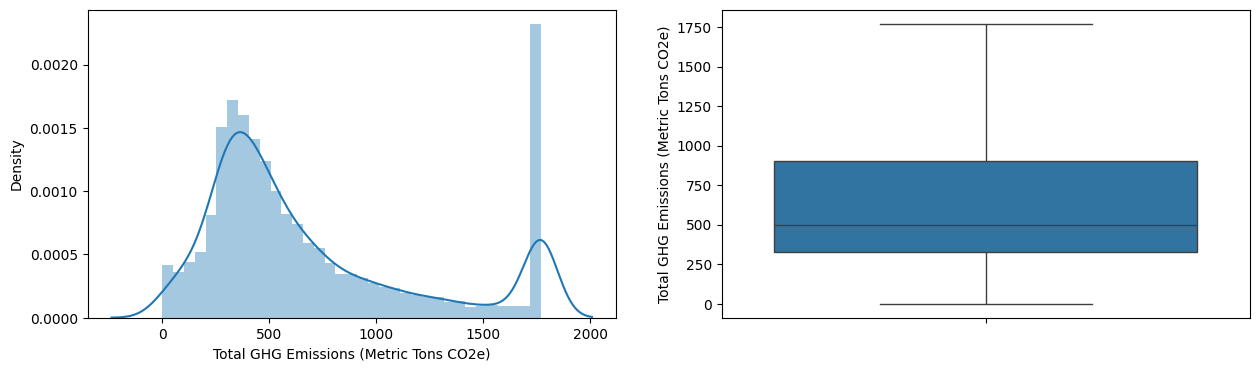

In [ ]:
#plotting the distribution
plot_col_distribution('Total GHG Emissions (Metric Tons CO2e)')

Skewness is 1.06 , its nearly symmetric
Kurtosis is -0.07 which is < 3 so its platykurtic

In [ ]:
print(data['Total GHG Emissions (Metric Tons CO2e)'].isna().sum())

72


In [ ]:
#imputing null values with mea
data['Total GHG Emissions (Metric Tons CO2e)'].fillna(np.round(data['Total GHG Emissions (Metric Tons CO2e)'].mean(),1), inplace=True)

####Water Use (All Water Sources) (kgal), Water Intensity (All Water Sources) (gal/ft²)

Droping these two columns as this information is not so crucial for Energy star score computation.

In [ ]:
#checking null values
print(data['Water Use (All Water Sources) (kgal)'].isna().sum())
print(data['Water Intensity (All Water Sources) (gal/ft²)'].isna().sum())

3867
3867


In [ ]:
data.drop(['Water Intensity (All Water Sources) (gal/ft²)','Water Use (All Water Sources) (kgal)'], axis=1, inplace=True)

####Source EUI:
Source EUI (Energy Use Intensity) is Source Energy divided by the property's Gross Floor Area. In addition to what the property consumes on-site, source energy includes losses that take place during generation, transmission, and distribution of the energy, thereby enabling a complete assessment of energy consumption resulting from building operations.

Source Link: https://data.cityofnewyork.us/Environment/NYC-Building-Energy-and-Water-Data-Disclosure-for-/5zyy-y8am/about_data

Checking for outliers and missing values and treat them

In [ ]:
LL_source_eui, UL_source_eui = check_outliers('Source EUI (kBtu/ft²)')

Q1: 99.4 | Q3: 161.525 | IQR: 62.125 | LL: 6.212500000000006 | UL: 254.7125
# of Outliers on the Higher Side: 742 | % of Outliers on the Higher Side: 6.4945295404814%
# of Outliers on the Lower Side: 63 | % of Outliers on the Lower Side: 0.5514223194748359%


6.4% higher side and 0.5% lower side outliers. Treating them with their limits

In [ ]:
data['Source EUI (kBtu/ft²)'] = np.where(data['Source EUI (kBtu/ft²)'] >= UL_source_eui, UL_source_eui, data['Source EUI (kBtu/ft²)'])
data['Source EUI (kBtu/ft²)'] = np.where(data['Source EUI (kBtu/ft²)'] <= LL_source_eui, LL_source_eui, data['Source EUI (kBtu/ft²)'])

The skewness for the original data is 0.47625736130564844.
The kurtosis for the original data is 0.03776835169292436.


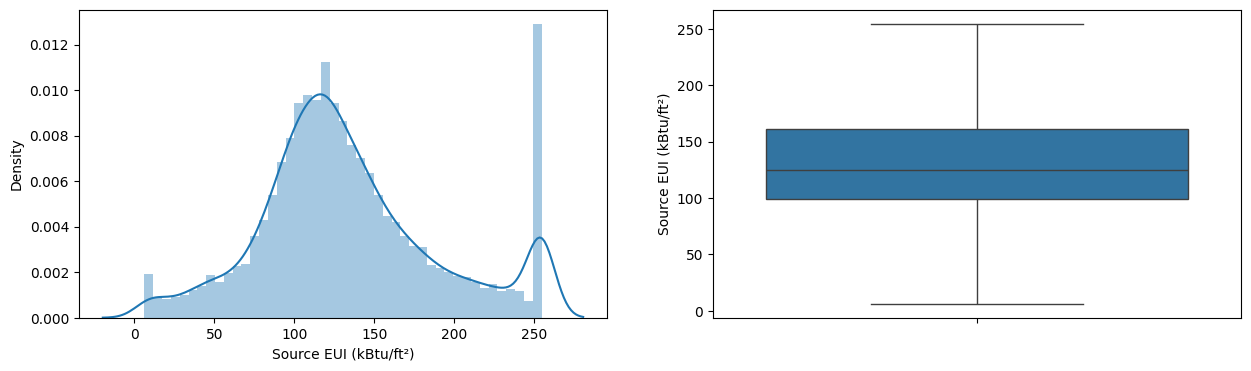

In [ ]:
#plotting distribution
plot_col_distribution('Source EUI (kBtu/ft²)')

Skewness is 0.4 , its nearly symmetric
Kurtosis is 0.03 which is < 3 so its platykurtic

In [ ]:
#checking null values
data['Source EUI (kBtu/ft²)'].isna().sum()

157

In [ ]:
#treating the missing values with mean
data['Source EUI (kBtu/ft²)'] = data['Source EUI (kBtu/ft²)'].fillna(np.round(data['Source EUI (kBtu/ft²)'].mean(),1))

####Release Date, Latitude, Longitude, Water Required

Keeping Latitude and Longitude and dropping Release Date and Water Required

In [ ]:
#dropping columns
data.drop(['Release Date', 'Water Required?'], axis=1, inplace=True)

####DOF Benchmarking Submission Status:

Indicates whether DOF has received a benchmarking submission for the property as of 08/01/14. It should be noted that this is not necessarily an indication of compliance, which is confirmed by the code enforcement division in the Department of Buildings at a later date.

In [ ]:
print(data['DOF Benchmarking Submission Status'].value_counts())
print(data['DOF Benchmarking Submission Status'].value_counts()/data.shape[0]*100)

In Compliance    11397
Name: DOF Benchmarking Submission Status, dtype: int64
In Compliance    99.754923
Name: DOF Benchmarking Submission Status, dtype: float64


99.73% of data indicates the property is 'In Compliance', which means the property benchmarking was submitted.

As almost all of the values are same, the data does not show any useful pattern. So this column can be dropped

In [ ]:
#dropping columns
data.drop('DOF Benchmarking Submission Status', axis=1, inplace=True)

####Community Board, Council District, Census Tract, NTA

Community Board: The Community Board field indicates the New York City Community District where the building is located

Council District: The Council District field indicates the New York City Council District where the building is located

Census tract: The Census Tract field indicates the U.S. Census Tract where the building is located.

NTA: The Neighborhood Tabulation Area field indicates the New York City Neighborhood area where the building is located

All these columns are more like location related. We already have postal code and Borough for location. So these features can be dropped.

In [ ]:
#dropping columns
data.drop(['Community Board','Council District','Census Tract','NTA'], axis=1, inplace=True)

#### Property GFA - Self-Reported (ft²):

Property GFA is equivalant to the sum of Largest Property Use Type - Gross Floor Area (ft²)','2nd Largest Property Use - Gross Floor Area (ft²)','3rd Largest Property Use Type - Gross Floor Area (ft²).

SO, dropping the Largest, 2nd largest and 3rd largest property types

In [ ]:
#droping columns
data.drop(['Largest Property Use Type - Gross Floor Area (ft²)','2nd Largest Property Use - Gross Floor Area (ft²)','3rd Largest Property Use Type - Gross Floor Area (ft²)'], axis=1, inplace=True)


####Columns to drop

- Property ID: As it is a id column, does not have any pattern that can be useful for the model
- bbl_digit1: Its a duplicate for Borough. Keeping Borough and will encode it later, but bbl_digit1 can be dropped
- Tax Block: Its a unique id for each tax block in the borough, dropping it as its also a id field
- Tax lot number: Its again a id relating to the purpose of taxation. This is also not relevant info so dropping it
- Keeping Primary Property Type and dropping the Largest Property Use Type, 2nd largest property use type and 3rd largest property use type.
  * 2nd and 3rd property use type cols have lot of null values.
  * Largest property use type values are very similar to Primary use type

In [ ]:
data.drop(['Property Id', 'bbl_digit1','Tax Block','Tax Lot Number', 'Largest Property Use Type','2nd Largest Property Use Type','3rd Largest Property Use Type'], axis=1, inplace=True)

In [ ]:
data.shape

(11425, 15)

In [ ]:
data.sample(5)

,Postal Code,Borough,Primary Property Type - Self Selected,Year Built,ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Source EUI (kBtu/ft²),Total GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Source EUI (kBtu/ft²),Latitude,Longitude,Standalone Property,is_fully_occupied
8517,11230,Brooklyn,Multifamily Housing,1939,48,94.7,101.0,132.2,465.1,84000.0,126.1,40.640791,-73.962404,1,1
4705,10025,Manhattan,Multifamily Housing,1915,42,89.8,99.0,149.3,343.3,51080.0,141.5,40.801841,-73.964700,1,1
1780,10018,Manhattan,Office,1924,87,59.9,63.2,125.3,254.8,58825.0,123.4,40.750719,-73.985967,1,0
6515,10458,Bronx,Multifamily Housing,1931,34,92.4,84.0,138.0,343.0,55226.0,122.9,40.868614,-73.884829,1,1
1775,10018,Manhattan,Hotel,2013,60,89.7,84.0,138.0,676.2,105103.0,182.1,40.750494,-73.985473,1,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11425 entries, 0 to 11745
Data columns (total 15 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Postal Code                               11425 non-null  object 
 1   Borough                                   11425 non-null  object 
 2   Primary Property Type - Self Selected     11425 non-null  object 
 3   Year Built                                11425 non-null  int64  
 4   ENERGY STAR Score                         9413 non-null   object 
 5   Site EUI (kBtu/ft²)                       11425 non-null  float64
 6   Weather Normalized Site EUI (kBtu/ft²)    11425 non-null  float64
 7   Weather Normalized Source EUI (kBtu/ft²)  11425 non-null  float64
 8   Total GHG Emissions (Metric Tons CO2e)    11425 non-null  float64
 9   Property GFA - Self-Reported (ft²)        11425 non-null  float64
 10  Source EUI (kBtu/ft²)             

####Energy star score

Checking null values, outliers

In [ ]:
data['ENERGY STAR Score'].isna().sum()

2012

In [ ]:
2012/data.shape[0]*100

17.61050328227571

17% are null values. As this is a target variable, imputing with mean can bias the data. Seperating the null values rows into a seperat dataset

In [ ]:
df_ess_nan = data[data['ENERGY STAR Score'].isna() == True]

In [ ]:
df_ess_nan.shape

(2012, 15)

Now dropping the nan rows from 'data'

In [ ]:
data.dropna(subset=['ENERGY STAR Score'], inplace=True)

In [ ]:
data.shape

(9413, 15)

Converting the col to int datatype

In [ ]:
data['ENERGY STAR Score'] = data['ENERGY STAR Score'].astype(int)

Checking outliers and treating them

In [ ]:
ll_ess, ul_ess = check_outliers('ENERGY STAR Score')

Q1: 37.0 | Q3: 85.0 | IQR: 48.0 | LL: -35.0 | UL: 157.0
# of Outliers on the Higher Side: 0 | % of Outliers on the Higher Side: 0.0%
# of Outliers on the Lower Side: 0 | % of Outliers on the Lower Side: 0.0%


There are no outliers, all the values are within the range of 1-100.

Plotting the distribution

The skewness for the original data is -0.45749458089528855.
The kurtosis for the original data is -0.9422703549294265.


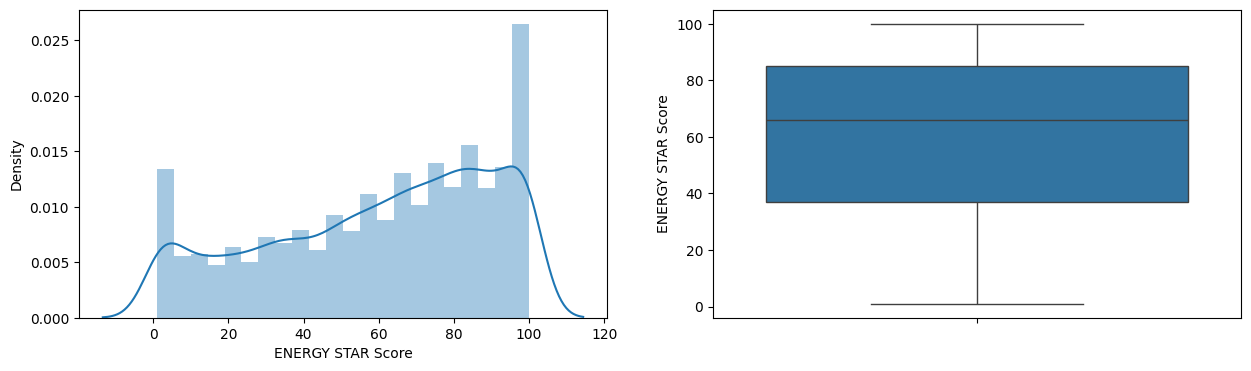

In [ ]:
plot_col_distribution('ENERGY STAR Score')

####EDA:

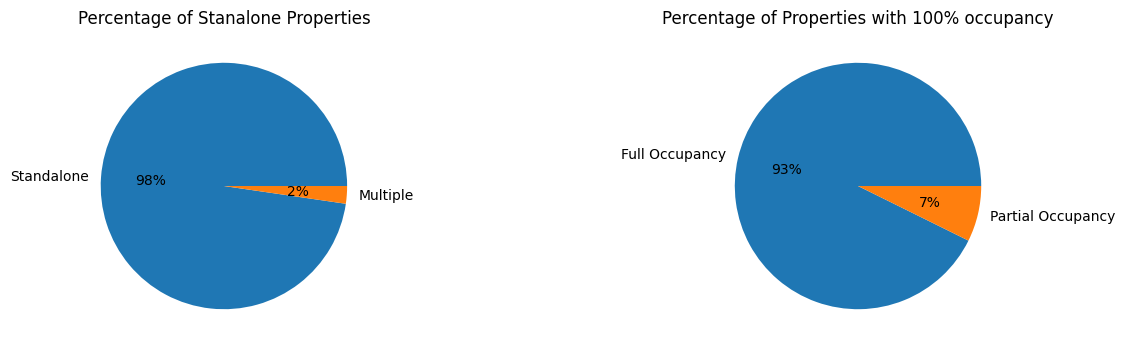

In [ ]:
plt.figure(figsize=(15,4))

standalone = data['Standalone Property'].value_counts()
plt.subplot(1,2,1)
plt.pie(standalone, labels=['Standalone','Multiple'], autopct='%.0f%%')
plt.title('Percentage of Stanalone Properties')

occupancy = data['is_fully_occupied'].value_counts()
plt.subplot(1,2,2)
plt.pie(occupancy, labels=['Full Occupancy', 'Partial Occupancy'], autopct='%.0f%%')
plt.title('Percentage of Properties with 100% occupancy')

plt.show()

Inference from the above plots:
1. 97% of the buildings are stand alone buildings, not part of any campus.
2. 93% of the properties listed are fully occupied

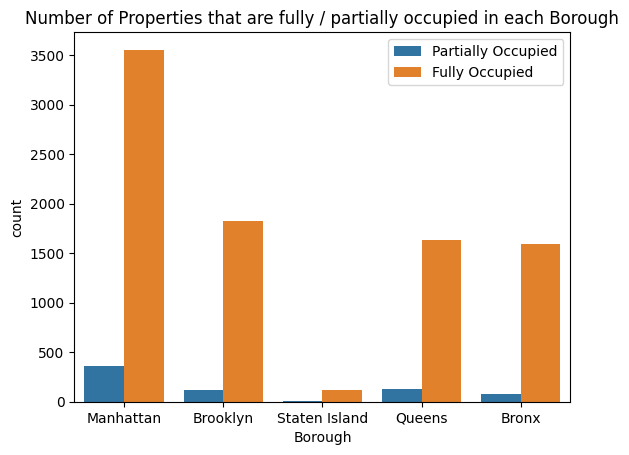

In [ ]:
sns.countplot(data=data, x='Borough', hue='is_fully_occupied')
plt.title('Number of Properties that are fully / partially occupied in each Borough')
plt.legend(labels=['Partially Occupied','Fully Occupied'])
plt.show()

Inference for the above plot:

very few properties are partially occupied. Most of them are full occupied. Also, most of the properties in this dataset are from Manhattan

In [ ]:
avg_ess_borough = pd.DataFrame(data['ENERGY STAR Score'].groupby(data['Borough']).mean())

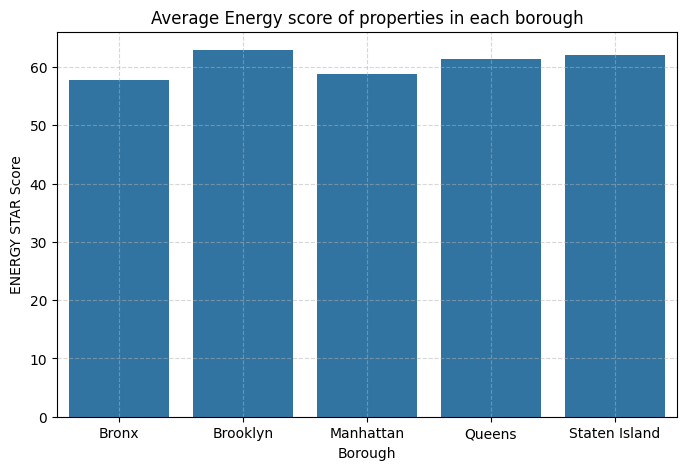

In [ ]:
fig, ax = plt.subplots(figsize=[8, 5])
sns.barplot(data=avg_ess_borough, x='Borough', y='ENERGY STAR Score')
plt.title("Average Energy score of properties in each borough")
plt.grid(linestyle="dashed", alpha=0.5)
plt.show()


Inference from the above plot:

The average Energy star score is maximum in Brooklyn, followed by Queens, then Bronx and then Staten Island. Manhatten has the least.

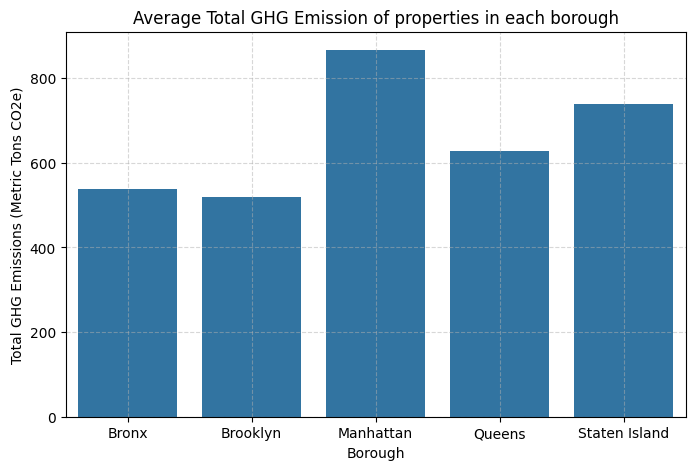

In [ ]:
avg_ghg_borough = pd.DataFrame(data['Total GHG Emissions (Metric Tons CO2e)'].groupby(data['Borough']).mean())
fig, ax = plt.subplots(figsize=[8, 5])
sns.barplot(data=avg_ghg_borough, x='Borough', y='Total GHG Emissions (Metric Tons CO2e)')
plt.title("Average Total GHG Emission of properties in each borough")
plt.grid(linestyle="dashed", alpha=0.5)
plt.show()


Manhattan has the max amout of Total GHG Emission

In [ ]:
#Creating bins for the year built data
data['year_range'] = pd.cut(data['Year Built'], bins=[1901,1920,1940,1960,1980,2000,2019],labels=['1900-1919','1920-1939','1940-1959','1960-1979','1980-1999','2000-2019'])

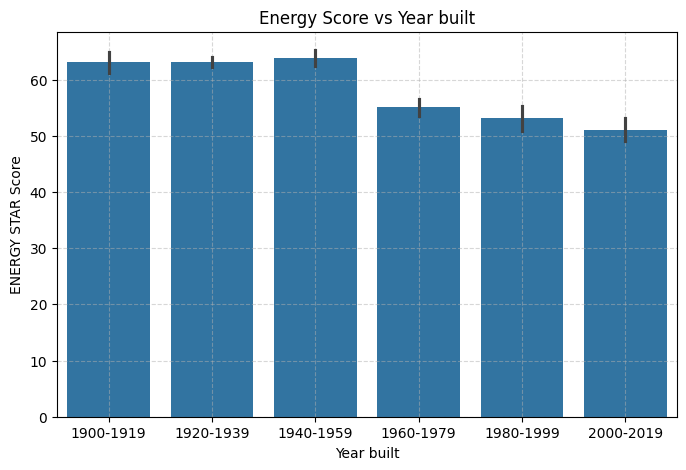

In [ ]:
fig, ax = plt.subplots(figsize=[8, 5])
sns.barplot(data=data, x='year_range', y='ENERGY STAR Score')
plt.title("Energy Score vs Year built")
plt.xlabel('Year built')
plt.grid(linestyle="dashed", alpha=0.5)
plt.show()

Older buildings have a higher energy star score than newer buildings

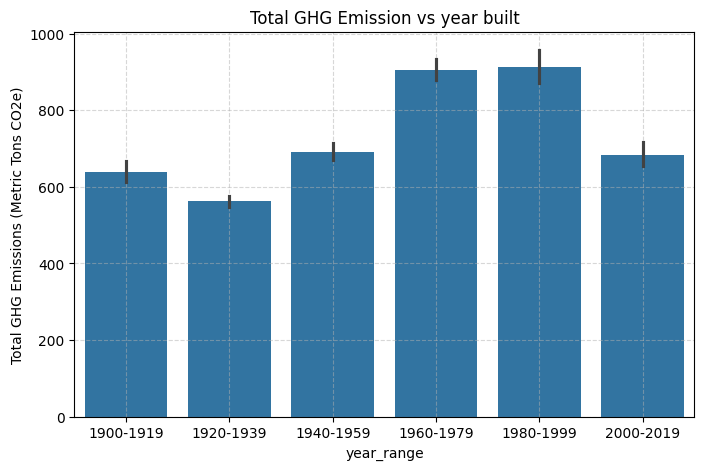

In [ ]:
fig, ax = plt.subplots(figsize=[8, 5])
sns.barplot(data=data, x='year_range', y='Total GHG Emissions (Metric Tons CO2e)')
plt.title("Total GHG Emission vs year built")
plt.grid(linestyle="dashed", alpha=0.5)
plt.show()

Total GHG emission was lowest for buildings built in 1920 to 1939

In [ ]:
sns.pairplot(data)

Output hidden; open in https://colab.research.google.com to view.

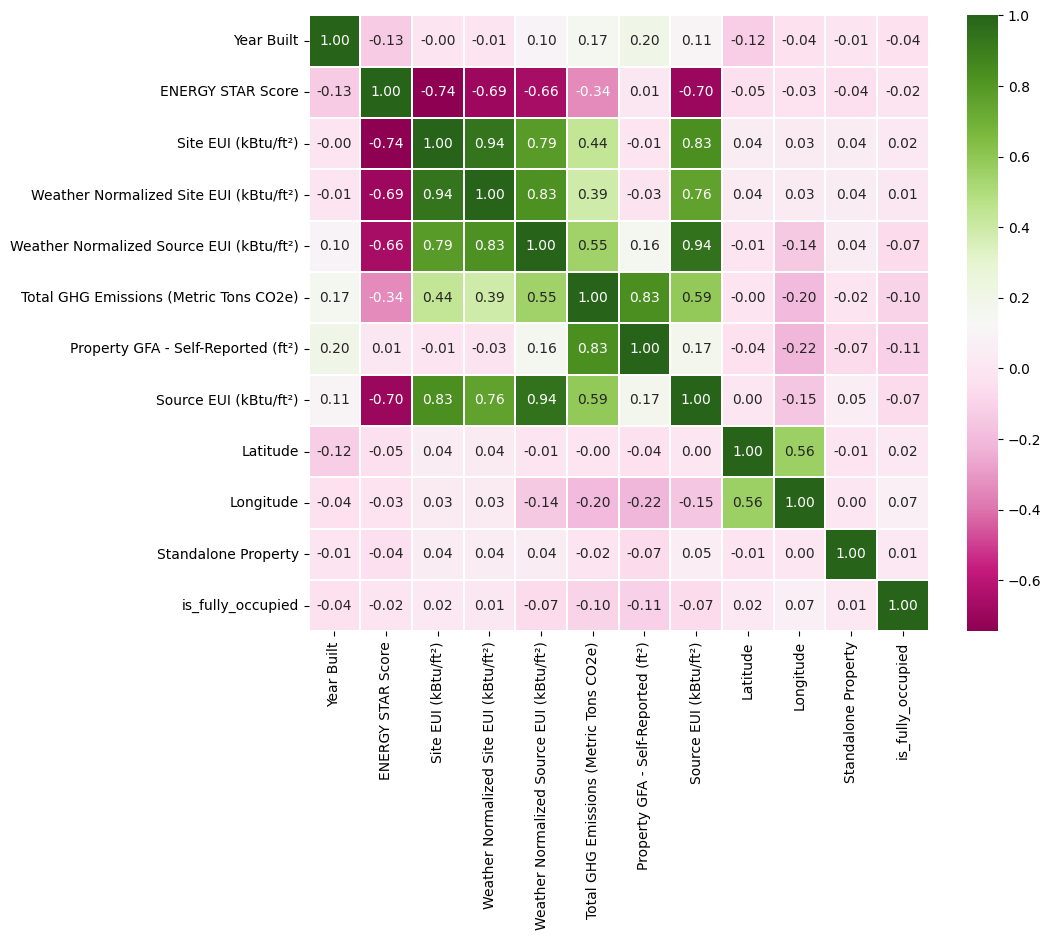

In [ ]:
#Correlation plot
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(data.corr(), annot = True, cmap="PiYG", linewidths = 0.1, annot_kws = {'size':10}, fmt = '.2f')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

The Heat map shows that the target variable Energy Star Score has a negetive correlation to SiteEUI, Weather Normalized Site EUI, Weather Normalized Source EUI, Total GHG Emissions and Source EUI. This indicates that, if the property has more energy usage or more GHG emission then the Energy star score will be come down.


####Encoding:
- Borough
- Primary Property type


In [ ]:
#Encoding Borough
data[['Brooklyn','Manhattan','Queens','Staten Island','Bronx']] = pd.get_dummies(data.Borough.astype('object')).astype(int)

In [ ]:
#dropping Borough column
data.drop('Borough', axis=1, inplace=True)


In [ ]:
#Encoding Property Types
data['Primary Property Type - Self Selected'].value_counts()

Multifamily Housing     7414
Office                  1119
Hotel                    285
Warehouse                220
Healthcare Facility      155
Educational Facility      85
Store Building            81
Other                     43
Religious Facility        10
Industrial Building        1
Name: Primary Property Type - Self Selected, dtype: int64

In [ ]:
data[['Multifamily Housing','Office','Hotel','Warehouse','Healthcare Facility','Educational Facility','Store Building','Other','Religious Facility','Industrial Building']] = pd.get_dummies(data['Primary Property Type - Self Selected'].astype('object')).astype(int)

In [ ]:
#dropping Primary Porperty type col as its not required anymore
data.drop('Primary Property Type - Self Selected', axis=1, inplace=True)

In [ ]:
#checking null values in Latitude and longitude
data['Latitude'].isna().sum()

1838

In [ ]:
data['Longitude'].isna().sum()

1838

In [ ]:
1838/data.shape[0]*100

19.526187187931583

In [ ]:
data['Postal Code'].nunique()

230

Almost 20% of the data are null values. I am going to drop Latitude and Longitude columns as we have Borough for Location.

Dropping Postal Code also as there are 230 unique values. It will increase the dimensions of the data set if I encode postal code.

In [ ]:
data.drop(['Postal Code', 'Latitude', 'Longitude'], axis=1, inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9413 entries, 1 to 11745
Data columns (total 26 columns):
 #   Column                                    Non-Null Count  Dtype   
---  ------                                    --------------  -----   
 0   Year Built                                9413 non-null   int64   
 1   ENERGY STAR Score                         9413 non-null   int64   
 2   Site EUI (kBtu/ft²)                       9413 non-null   float64 
 3   Weather Normalized Site EUI (kBtu/ft²)    9413 non-null   float64 
 4   Weather Normalized Source EUI (kBtu/ft²)  9413 non-null   float64 
 5   Total GHG Emissions (Metric Tons CO2e)    9413 non-null   float64 
 6   Property GFA - Self-Reported (ft²)        9413 non-null   float64 
 7   Source EUI (kBtu/ft²)                     9413 non-null   float64 
 8   Standalone Property                       9413 non-null   int64   
 9   is_fully_occupied                         9413 non-null   int64   
 10  year_range             

####Scaling the numerical columns:
- Site EUI (kBtu/ft²)
- Weather Normalized Site EUI (kBtu/ft²)
- Weather Normalized Source EUI (kBtu/ft²)
- Total GHG Emissions (Metric Tons CO2e)
- Property GFA - Self-Reported (ft²)
- Source EUI (kBtu/ft²)
- Energy Star Score

In [ ]:
from sklearn.preprocessing import MinMaxScaler
to_be_scaled = ['Site EUI (kBtu/ft²)','Weather Normalized Site EUI (kBtu/ft²)','Weather Normalized Source EUI (kBtu/ft²)','Total GHG Emissions (Metric Tons CO2e)','Property GFA - Self-Reported (ft²)','Source EUI (kBtu/ft²)', 'ENERGY STAR Score']
for col in to_be_scaled:
  mm_scaler = MinMaxScaler()
  col_scaler = mm_scaler.fit_transform(data[[col]])
  data[col] = col_scaler.ravel()

In [ ]:
data.sample(5)

,Year Built,ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Source EUI (kBtu/ft²),Total GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Source EUI (kBtu/ft²),Standalone Property,is_fully_occupied,year_range,Brooklyn,Manhattan,Queens,Staten Island,Bronx,Multifamily Housing,Office,Hotel,Warehouse,Healthcare Facility,Educational Facility,Store Building,Other,Religious Facility,Industrial Building
8974,1938,0.767677,0.403873,0.378369,0.319754,0.152708,0.233568,0.340392,1,1,1920-1939,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
7836,1975,0.202020,0.752465,0.756402,0.677067,0.565708,0.474006,0.679628,1,1,1960-1979,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2821,1923,0.323232,1.000000,0.996968,0.933426,0.845428,0.438974,0.940795,1,1,1920-1939,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
5219,1920,0.252525,0.730634,0.689690,0.584062,0.293782,0.261794,0.609608,1,1,1900-1919,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
8193,2000,0.707071,0.177113,0.163410,0.386526,0.111594,0.212598,0.403169,1,1,1980-1999,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
data['Year Built'].value_counts()

1928    360
1927    354
1929    325
1930    294
1931    280
       ... 
1994      8
1943      6
1944      6
2016      5
2019      1
Name: Year Built, Length: 117, dtype: int64

####Binning Year Built:
As there are 117 unique year values, it will increase the dimension of the dataset. So, I am going to seperate the year built into bins of 10 years each and then encode it to dummy values, this way it will add only 12 columns

In [ ]:
#creating bins from year built
data['year_range'] = pd.cut(data['Year Built'], bins=[1901,1910,1920,1930,1940,1950,1960, 1970, 1980, 1990, 2000, 2010, 2020],
                                        labels=['1900-1910','1911-1920','1921-1930','1931-1940','1941-1950','1951-1960','1961-1970','1971-1980','1981-1990','1991-2000', '2001-2010','2011-2020'])

In [ ]:
#Encoding the year bins with dummy values
data[['1900-1910','1911-1920','1921-1930','1931-1940','1941-1950','1951-1960','1961-1970','1971-1980','1981-1990','1991-2000', '2001-2010','2011-2020']] = pd.get_dummies(data.year_range.astype('object')).astype(int)


In [ ]:
#dropping year_range and Year Built columns
data.drop(['year_range', 'Year Built'], axis=1, inplace=True)

In [ ]:
data.sample(5)

,ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Source EUI (kBtu/ft²),Total GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Source EUI (kBtu/ft²),Standalone Property,is_fully_occupied,Brooklyn,Manhattan,Queens,Staten Island,Bronx,Multifamily Housing,Office,Hotel,Warehouse,Healthcare Facility,Educational Facility,Store Building,Other,Religious Facility,Industrial Building,1900-1910,1911-1920,1921-1930,1931-1940,1941-1950,1951-1960,1961-1970,1971-1980,1981-1990,1991-2000,2001-2010,2011-2020
6807,1.000000,0.000000,0.000000,0.015700,0.016152,0.236230,0.027716,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
10466,0.020202,0.425704,0.395216,0.816176,0.204269,0.190612,0.849044,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
183,0.050505,1.000000,1.000000,1.000000,1.000000,0.880000,1.000000,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3876,0.000000,1.000000,0.940364,0.823331,1.000000,1.000000,0.863531,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
6413,0.111111,0.573592,0.574461,0.502186,0.201220,0.172870,0.506590,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9413 entries, 1 to 11745
Data columns (total 36 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   ENERGY STAR Score                         9413 non-null   float64
 1   Site EUI (kBtu/ft²)                       9413 non-null   float64
 2   Weather Normalized Site EUI (kBtu/ft²)    9413 non-null   float64
 3   Weather Normalized Source EUI (kBtu/ft²)  9413 non-null   float64
 4   Total GHG Emissions (Metric Tons CO2e)    9413 non-null   float64
 5   Property GFA - Self-Reported (ft²)        9413 non-null   float64
 6   Source EUI (kBtu/ft²)                     9413 non-null   float64
 7   Standalone Property                       9413 non-null   int64  
 8   is_fully_occupied                         9413 non-null   int64  
 9   Brooklyn                                  9413 non-null   int64  
 10  Manhattan                          

####Train Test Split

In [ ]:
#Train test split
X = data.drop('ENERGY STAR Score', axis=1)
Y = data['ENERGY STAR Score']
print(X.shape)
print(Y.shape)

(9413, 35)
(9413,)


In [ ]:
## Splitting dataset into 80% Training and 20% Testing Data:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,train_size=0.8, random_state =10)
print("The shape of Xtrain is:", Xtrain.shape)
print("The shape of Xtest is:", Xtest.shape)

print('')

print("The shape of Ytrain is:", Ytrain.shape)
print("The shape of Ytest is:", Ytest.shape)

The shape of Xtrain is: (7530, 35)
The shape of Xtest is: (1883, 35)

The shape of Ytrain is: (7530,)
The shape of Ytest is: (1883,)


####Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(Xtrain, Ytrain)

LinearRegression()

In [ ]:
Ypred = lr.predict(Xtest)
Ypred_train = lr.predict(Xtrain)

In [ ]:
from sklearn import metrics
mse_train = metrics.mean_squared_error(Ytrain, Ypred_train)
print(f'Mean Squared Error - Train: {mse_train}')

mse_test = metrics.mean_squared_error(Ytest, Ypred)
print(f'Mean Squared Error - Test: {mse_test}')

mae_test = metrics.mean_absolute_error(Ytest, Ypred)
print(f'Mean Absolute Error - Test: {mse_test}')

rmse_test = np.sqrt(metrics.mean_squared_error(Ytest, Ypred))
print(f'Root Mean Squared Error - Test: {mse_test}')

r2_train = metrics.r2_score(Ytrain, Ypred_train)
print(f'R-squared - Train: {r2_train}')

r2_test = metrics.r2_score(Ytest, Ypred)
print(f'R-squared - Test: {r2_test*100}%')


Mean Squared Error - Train: 0.0263153888657503
Mean Squared Error - Test: 0.02757593159087311
Mean Absolute Error - Test: 0.02757593159087311
Root Mean Squared Error - Test: 0.02757593159087311
R-squared - Train: 0.7088644588997504
R-squared - Test: 71.03850321802692%




---



####Random Forest Model

In [ ]:
Xrf_train, Xrf_test, Yrf_train, Yrf_test = train_test_split(X,Y,train_size=0.8, random_state =10)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=10, random_state=0)
rf_model.fit(Xrf_train, Yrf_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [ ]:
ytrainpred = rf_model.predict(Xrf_train)
ytestpred = rf_model.predict(Xrf_test)

In [ ]:
# Evaluating the model

mse_train = metrics.mean_squared_error(Yrf_train, ytrainpred)
print(f'Mean Squared Error - Train: {mse_train}')

mse_test = metrics.mean_squared_error(Yrf_test, ytestpred)
print(f'Mean Squared Error - Test: {mse_test}')

r2_train = metrics.r2_score(Yrf_train, ytrainpred)
print(f'R-squared - Train: {r2_train}')

r2_test = metrics.r2_score(Yrf_test, ytestpred)
print(f'R-squared - Test: {r2_test}')

Mean Squared Error - Train: 0.0036610162971389202
Mean Squared Error - Test: 0.019213960775745918
R-squared - Train: 0.95949700891437
R-squared - Test: 0.7982062504971192




---



####KNN - Regression model

In [ ]:
Xknn_train, Xknn_test, Yknn_train, Yknn_test = train_test_split(X,Y,train_size=0.8, random_state =10)

In [ ]:
from sklearn import neighbors
mse_val = [] #to store rmse values for different k
r2_val = []
for K in range(10):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(Xknn_train, Yknn_train)  #fit the model
    pred=model.predict(Xknn_test) #make prediction on test set
    error = metrics.mean_squared_error(Yknn_test,pred) #calculate mse
    mse_val.append(error) #store rmse values
    r2 = metrics.r2_score(Yknn_test, pred)
    print('MSE value for k= ' , K , 'is:', error, 'r2 score is: ',r2)


MSE value for k=  1 is: 0.03944333988267751 r2 score is:  0.5857481161359863
MSE value for k=  2 is: 0.03157194880186883 r2 score is:  0.6684170430968956
MSE value for k=  3 is: 0.028496049974777782 r2 score is:  0.7007215306856145
MSE value for k=  4 is: 0.027908187590512706 r2 score is:  0.7068955286497562
MSE value for k=  5 is: 0.027261206452374644 r2 score is:  0.7136904186386711
MSE value for k=  6 is: 0.027650766570321485 r2 score is:  0.7095990812109134
MSE value for k=  7 is: 0.027734201128871608 r2 score is:  0.7087228135530134
MSE value for k=  8 is: 0.02775858527203295 r2 score is:  0.7084667201980632
MSE value for k=  9 is: 0.027866246707558082 r2 score is:  0.7073360108661849
MSE value for k=  10 is: 0.028659910010591556 r2 score is:  0.6990005981092204


Out of all the 20 k values, K=5 gave the best r2 score: 71.37%

In [ ]:
knn_model = neighbors.KNeighborsRegressor(n_neighbors = 5)
knn_model.fit(Xknn_train, Yknn_train)  #fit the model

KNeighborsRegressor()

In [ ]:
pred_test = knn_model.predict(Xknn_test) #make prediction on test set
pred_train = knn_model.predict(Xknn_train)

In [ ]:
# Evaluating the model

mse_train = metrics.mean_squared_error(Yknn_train, pred_train)
print(f'Mean Squared Error - Train: {mse_train}')

mse_test = metrics.mean_squared_error(Yknn_test, pred_test)
print(f'Mean Squared Error - Test: {mse_test}')

r2_train = metrics.r2_score(Yknn_train, pred_train)
print(f'R-squared - Train: {r2_train}')

r2_test = metrics.r2_score(Yknn_test, pred_test)
print(f'R-squared - Test: {r2_test}')

Mean Squared Error - Train: 0.018732867462232836
Mean Squared Error - Test: 0.027261206452374644
R-squared - Train: 0.7927523118583063
R-squared - Test: 0.7136904186386711




---



####Decision Tree Regressor Model

In [ ]:
Xdt_train, Xdt_test, Ydt_train, Ydt_test = train_test_split(X,Y,train_size=0.8, random_state =10)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(Xdt_train, Ydt_train)

DecisionTreeRegressor()

In [ ]:
ytrainpred_dt = dtr.predict(Xdt_train)
ytestpred_dt = dtr.predict(Xdt_test)

In [ ]:
# Evaluating the model

mse_train = metrics.mean_squared_error(Ydt_train, ytrainpred_dt)
print(f'Mean Squared Error - Train: {mse_train}')

mse_test = metrics.mean_squared_error(Ydt_test, ytestpred_dt)
print(f'Mean Squared Error - Test: {mse_test}')

r2_train = metrics.r2_score(Ydt_train, ytrainpred_dt)
print(f'R-squared - Train: {r2_train}')

r2_test = metrics.r2_score(Ydt_test, ytestpred_dt)
print(f'R-squared - Test: {r2_test}')

Mean Squared Error - Train: 9.935995455198107e-05
Mean Squared Error - Test: 0.033890932477166576
R-squared - Train: 0.9989007491289693
R-squared - Test: 0.6440620224774608




---



####All Models Scores
Consolidated list of MSE and R2 scores from train and test data for all the models tried:



\begin{array}{|c|c|c|} \hline
Model & r2\ Score\ Train & r2\ Score\ Test & MSE\ Train & MSE\ Test \\ \hline
Linear\ Regression & 70.88\% & 71.03\% & 0.0263 & 0.0275 \\ \hline
Random\ Forest & 95.94\% & 79.82\% & 0.0036 & 0.0192 \\ \hline
KNN\ Regressor & 79.27\% & 71.36\% & 0.0187 & 0.0272 \\ \hline
Decision\ Tree\ Regressor & 99.89\% & 63.78\% & 9.9359 & 0.0344 \\ \hline
\end{array}


- From the above table we can see that Random Forest is giving the best accuracy.
- Linear Regression is almost same for train and test.
- Decision tree is giving 99% accuracy for train and 63% for test, this looks like a overfitting problem
- KNN is has more accuracy for train than test, the test accuracy is almost similar to Linear regression.

Applying Hyper Parameter Tuning for Random Forest and KNN



---



####Hyperparameter Tuning using grid search CV - Random Forest Regressor

In [ ]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'n_estimators': [50,100,200,300,500],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}


grid_search = GridSearchCV(RandomForestRegressor(), param_grid=param_grid)
grid_search.fit(Xrf_train, Yrf_train)
print(grid_search.best_estimator_)
print(grid_search.best_params_)

RandomForestRegressor(max_depth=9, max_features='auto', max_leaf_nodes=9,
                      n_estimators=50)
{'max_depth': 9, 'max_features': 'auto', 'max_leaf_nodes': 9, 'n_estimators': 50}


In [216]:
model_grid = RandomForestRegressor(max_depth=9, max_features="auto", max_leaf_nodes=9, n_estimators=50)
model_grid.fit(Xrf_train, Yrf_train)
y_pred_grid_test = model_grid.predict(Xrf_test)
y_pred_grid_train = model_grid.predict(Xrf_train)
mse_train_hpt = metrics.mean_squared_error(Yrf_train, y_pred_grid_train)
print(f'Mean Squared Error - Train: {mse_train_hpt}')

mse_test_hpt = metrics.mean_squared_error(Yrf_test, y_pred_grid_test)
print(f'Mean Squared Error - Test: {mse_test_hpt}')

r2_train_hpt = metrics.r2_score(Yrf_train, y_pred_grid_train)
print(f'R-squared - Train: {r2_train_hpt}')

r2_test_hpt = metrics.r2_score(Yrf_test, y_pred_grid_test)
print(f'R-squared - Test: {r2_test_hpt}')

Mean Squared Error - Train: 0.02230212915599279
Mean Squared Error - Test: 0.022457971416912723
R-squared - Train: 0.7532644312177261
R-squared - Test: 0.7641361762241128


The R2 score did not improve much from Hyper parameter tuning

Plotting the predictions from the Random Forest Model

In [221]:
ytestpred = rf_model.predict(Xrf_test)

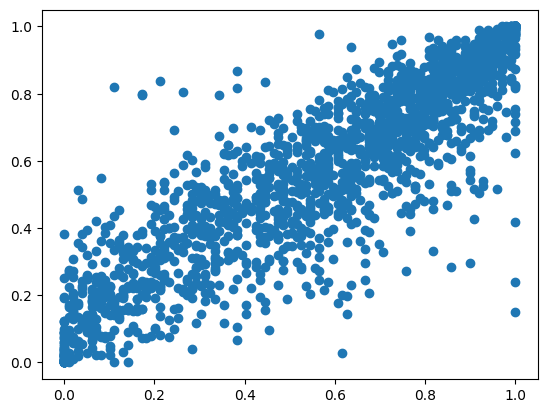

In [220]:
plt.scatter(Yrf_test,ytestpred)

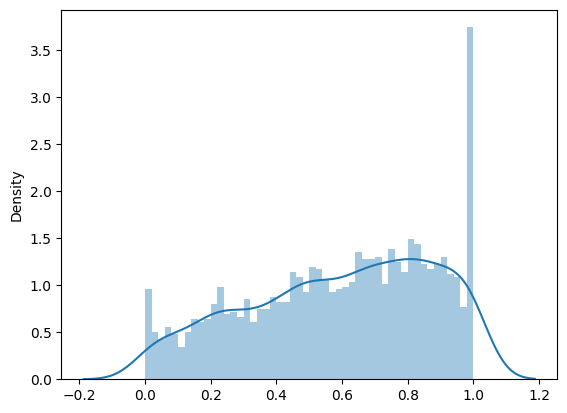

In [222]:
sns.distplot((ytestpred),bins=50);



---

